In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.arff


In [2]:
# Importe inicial das bibliotecas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Scalar os dados 
from sklearn.svm import SVC # Modelo SVM
from sklearn.neural_network import MLPClassifier # Modelo MLP 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import matplotlib.pyplot as plt

!pip install seaborn

import seaborn as sns

# 01. Introdução

A evolução da inteligência artificial e, em particular, do campo de machine learning tem desencadeado um crescente interesse em entender como modelos complexos, como os perceptrons multi-camadas e support vector machines, operam em suas etapas internas. No contexto da disciplina de redes neurais artificiais, este ensaio surge como uma oportunidade para explorar esses "caixas-pretas" e revelar os mecanismos subjacentes que orientam suas decisões.

O objetivo deste trabalho é conduzir uma análise profunda das ferramentas de interpretação em machine learning, com foco especial em um modelo aplicado a um dataset específico. Para esse fim, utilizamos um conjunto de dados sobre "Phoenix dactylifera", obtido a partir de um experimento em visão computacional, que emprega fotos dessas tâmaras para extrair informações essenciais, como tamanho, formato, cor e dimensões. O dataset, disponibilizado na plataforma Kaggle, originou-se do estudo intitulado "Classification of Date Fruits into Genetic Varieties Using Image Analysis" (KOKLU et al., 2021).

A escolha desse dataset foi motivada pela sua criação por meio de um processo de inteligência artificial, proporcionando uma oportunidade única para explorar as capacidades de interpretação dos modelos de machine learning em um contexto real. Além disso, a complexidade e abrangência do dataset favorecem a construção de um modelo robusto, cujos resultados podem ser analisados e compreendidos de forma clara e concisa pelos seres humanos.

Neste ensaio, a metodologia adotada envolveu o uso de um notebook do Kaggle para realizar o pré-processamento dos dados, seguido da aplicação de modelos de classificação, incluindo Support Vector Machines (SVM) e Perceptrons Multi-Camadas (MLP). Posteriormente, focamos nossa análise no modelo MLP e empregamos ferramentas de interpretação, como "Feature Importance" e "Local Surrogate" (LIME), para desvendar os fatores que influenciam as previsões e decisões desse modelo.

Ao desbravar os intrincados mecanismos desses algoritmos, almejamos contribuir para a compreensão mais profunda dos modelos de machine learning e destacar a relevância das ferramentas de interpretação no processo de tomada de decisões informadas em contextos diversos. Através dessa abordagem, esperamos ampliar o conhecimento sobre como esses modelos podem ser aplicados e interpretados em cenários reais, permitindo uma utilização mais confiável e responsável da inteligência artificial em diversos domínios.

## Item 1. Construção dos modelos

Escolha uma base de dados de um problema de classificação ou regressão, e construa um modelo de aprendizado de máquina, baseados em redes neurais;

### Base de Dados: date-fruit-datasets

https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets


In [3]:
import pandas as pd

# Salvando na variável dados
dados_caminho = '/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'
dados = pd.read_excel(dados_caminho)

# Explorando os dados do dataset


In [4]:
# Exploração de dados
# Verificar as primeiras linhas do dataframe
dados.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0      4.2287 -59191263232 -50714214400 -39922372608     58.7255     54.9554   
1      3.1704 -34233065472 -37462601728 -31477794816     50.0259     52.8168   
2      4.7192 -93948354560 -74738221056 -60311207936     65.4772     59.2860   
3      8.2618 -32074307584 -32060925952 -29575010304     43.3900     44.1259   
4      4.4146 -39980974080 -35980042240 -25593278464     52.7743     50.9080   

   ALLdaub4RB  Class  
0     47.8400  BERHI  
1     47.8315  BERHI  
2     51.9378  BERHI  
3     41.1882  BERHI  
4     42.6666  BERHI  

[5 rows x 35 columns]

In [5]:
# Verificar as informações do dataframe (número de linhas, colunas, tipos de dados)
print(f'Formato: {dados.shape[0]} linhas e {dados.shape[1]} colunas')
print('Informações da base:')
print(dados.info())

Formato: 898 linhas e 35 colunas
Informações da base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  

In [6]:
# Verificar a estatística descritiva dos dados numéricos
dados.describe()

AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947    0.053745     17.820778  ...   
min     50.298400    0.836600    2257.000000    0.512300      1.065300  ...   
25%    513.317075    0.978825  210022.750000    0.705875      1.373725  ...   
50%    638.140950    0.987300  327207.000000    0.746950      1.524150  ...   
75%    697.930525    0.991800  388804.000000    0.775850      1.674750  ...   
max    833.827900    0.997400  552598.000000    0.856200    535.525700  ...   

           SkewRB  KurtosisRR  KurtosisRG  KurtosisRB     EntropyRR  \
count  898.000000  898.000000  898.000000  898.000000  8.980000e+02   
mean     0.250518    4.247845    5.110894    3.780928 -3.185021e+10   
std      0.632918    2.892357    3.745463    2.049831  2.037241e+10   
min     -1.029100    1.708200    1.607600    1.767200 -1.091224e+11   
25%     -0.196950    2.536625    2.508850    2.577275 -4.429444e+10   
50%      0.135550    3.069800    3.127800    3.080700 -2.826156e+10   
75%      0.593950    4.449850    7.320400    4.283125 -1.460482e+10   
max      3.092300   26.171100   26.736700   32.249500 -1.627316e+08   

          EntropyRG     EntropyRB  ALLdaub4RR  ALLdaub4RG  ALLdaub4RB  
count  8.980000e+02  8.980000e+02  898.000000  898.000000  898.000000  
mean  -2.901860e+10 -2.771876e+10   50.082888   48.805681   48.098393  
std    1.712952e+10  1.484137e+10   16.063125   14.125911   10.813862  
min   -9.261697e+10 -8.747177e+10   15.191100   20.524700   22.130000  
25%   -3.894638e+10 -3.564534e+10   38.224425   38.654525   39.250725  
50%   -2.620990e+10 -2.392928e+10   53.841300   50.337800   49.614100  
75%   -1.433105e+10 -1.660367e+10   63.063350   59.573600   56.666675  
max   -5.627727e+08 -4.370435e+08   79.828900   83.064900   74.104600  

[8 rows x 34 columns]

In [7]:
# Verificar a contagem de valores únicos em cada coluna
dados.nunique()

AREA             897
PERIMETER        898
MAJOR_AXIS       898
MINOR_AXIS       898
ECCENTRICITY     784
EQDIASQ          897
SOLIDITY         343
CONVEX_AREA      898
EXTENT           708
ASPECT_RATIO     859
ROUNDNESS        743
COMPACTNESS      718
SHAPEFACTOR_1     36
SHAPEFACTOR_2     28
SHAPEFACTOR_3    788
SHAPEFACTOR_4    243
MeanRR           897
MeanRG           896
MeanRB           898
StdDevRR         894
StdDevRG         893
StdDevRB         893
SkewRR           884
SkewRG           884
SkewRB           882
KurtosisRR       885
KurtosisRG       888
KurtosisRB       880
EntropyRR        898
EntropyRG        898
EntropyRB        898
ALLdaub4RR       898
ALLdaub4RG       896
ALLdaub4RB       897
Class              7
dtype: int64

Text(0.5, 1.0, 'Distribuição de \nClasses')

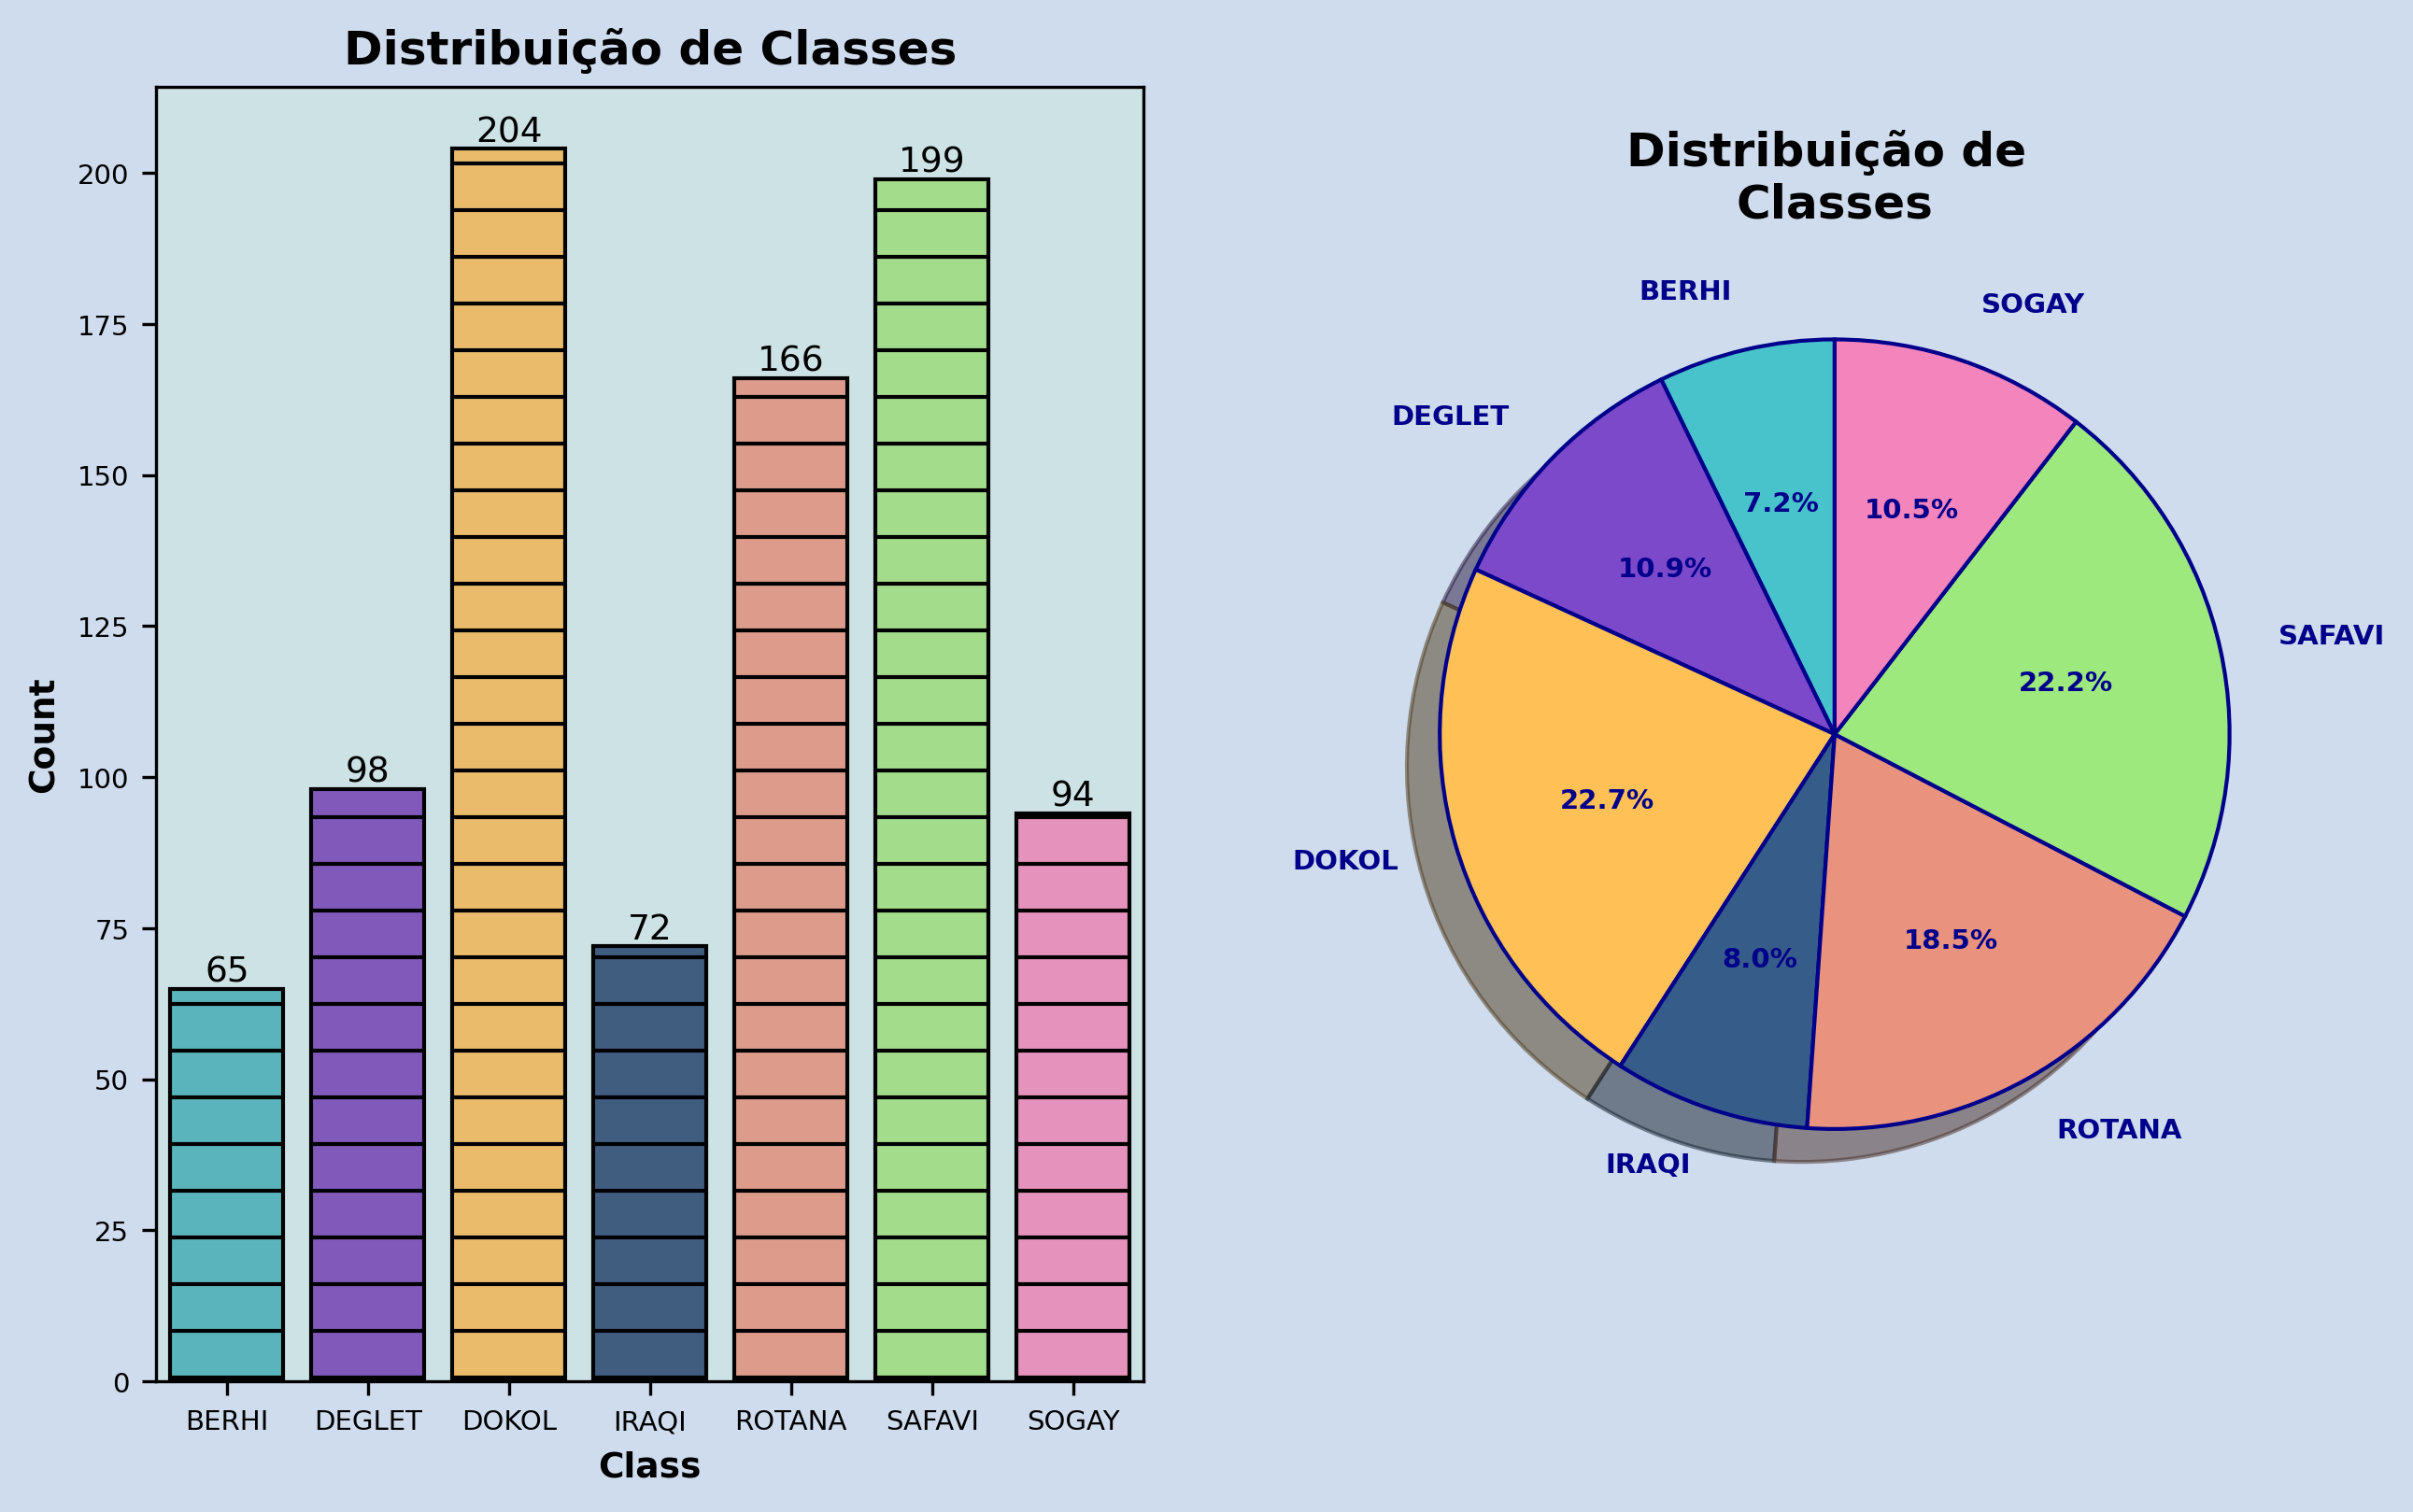

In [8]:
from collections import OrderedDict

colors = ["#49C3CB", "#7D49CB", "#FFC156", "#365C89", 
             "#E9937E", "#9EE97E", "#F384BC"]

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.facecolor']='#CDE2E5'

type_dict = dados["Class"].value_counts().to_dict()
type_dict = OrderedDict(sorted(type_dict.items()))
type_label = type_dict.keys()
type_value = type_dict.values()
explode = (0,)*dados["Class"].nunique()

fig, ax = plt.subplots(1,2, facecolor='#cfdcee')
sns.countplot(data=dados, x="Class", palette=colors, edgecolor="black", hatch="-", ax=ax[0])
ax[0].set_title("Distribuição de Classes", size=12, fontweight="bold")
ax[0].set_xlabel("Class", size=9, fontweight="bold")
ax[0].set_ylabel("Count", size=9, fontweight="bold")
ax[0].tick_params(axis="x", labelsize=7) 
ax[0].tick_params(axis="y", labelsize=7)
ax[0].bar_label(ax[0].containers[0], fmt='%.0f', color="black", fontsize=9)

plt.pie(type_value, explode=explode, labels=type_label, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 7, "fontweight" : "bold", "color":"darkblue"},  wedgeprops=
       {'edgecolor':'darkblue'} ,colors=colors, labeldistance=1.15)
plt.title("Distribuição de \nClasses", size=12, fontweight="bold")

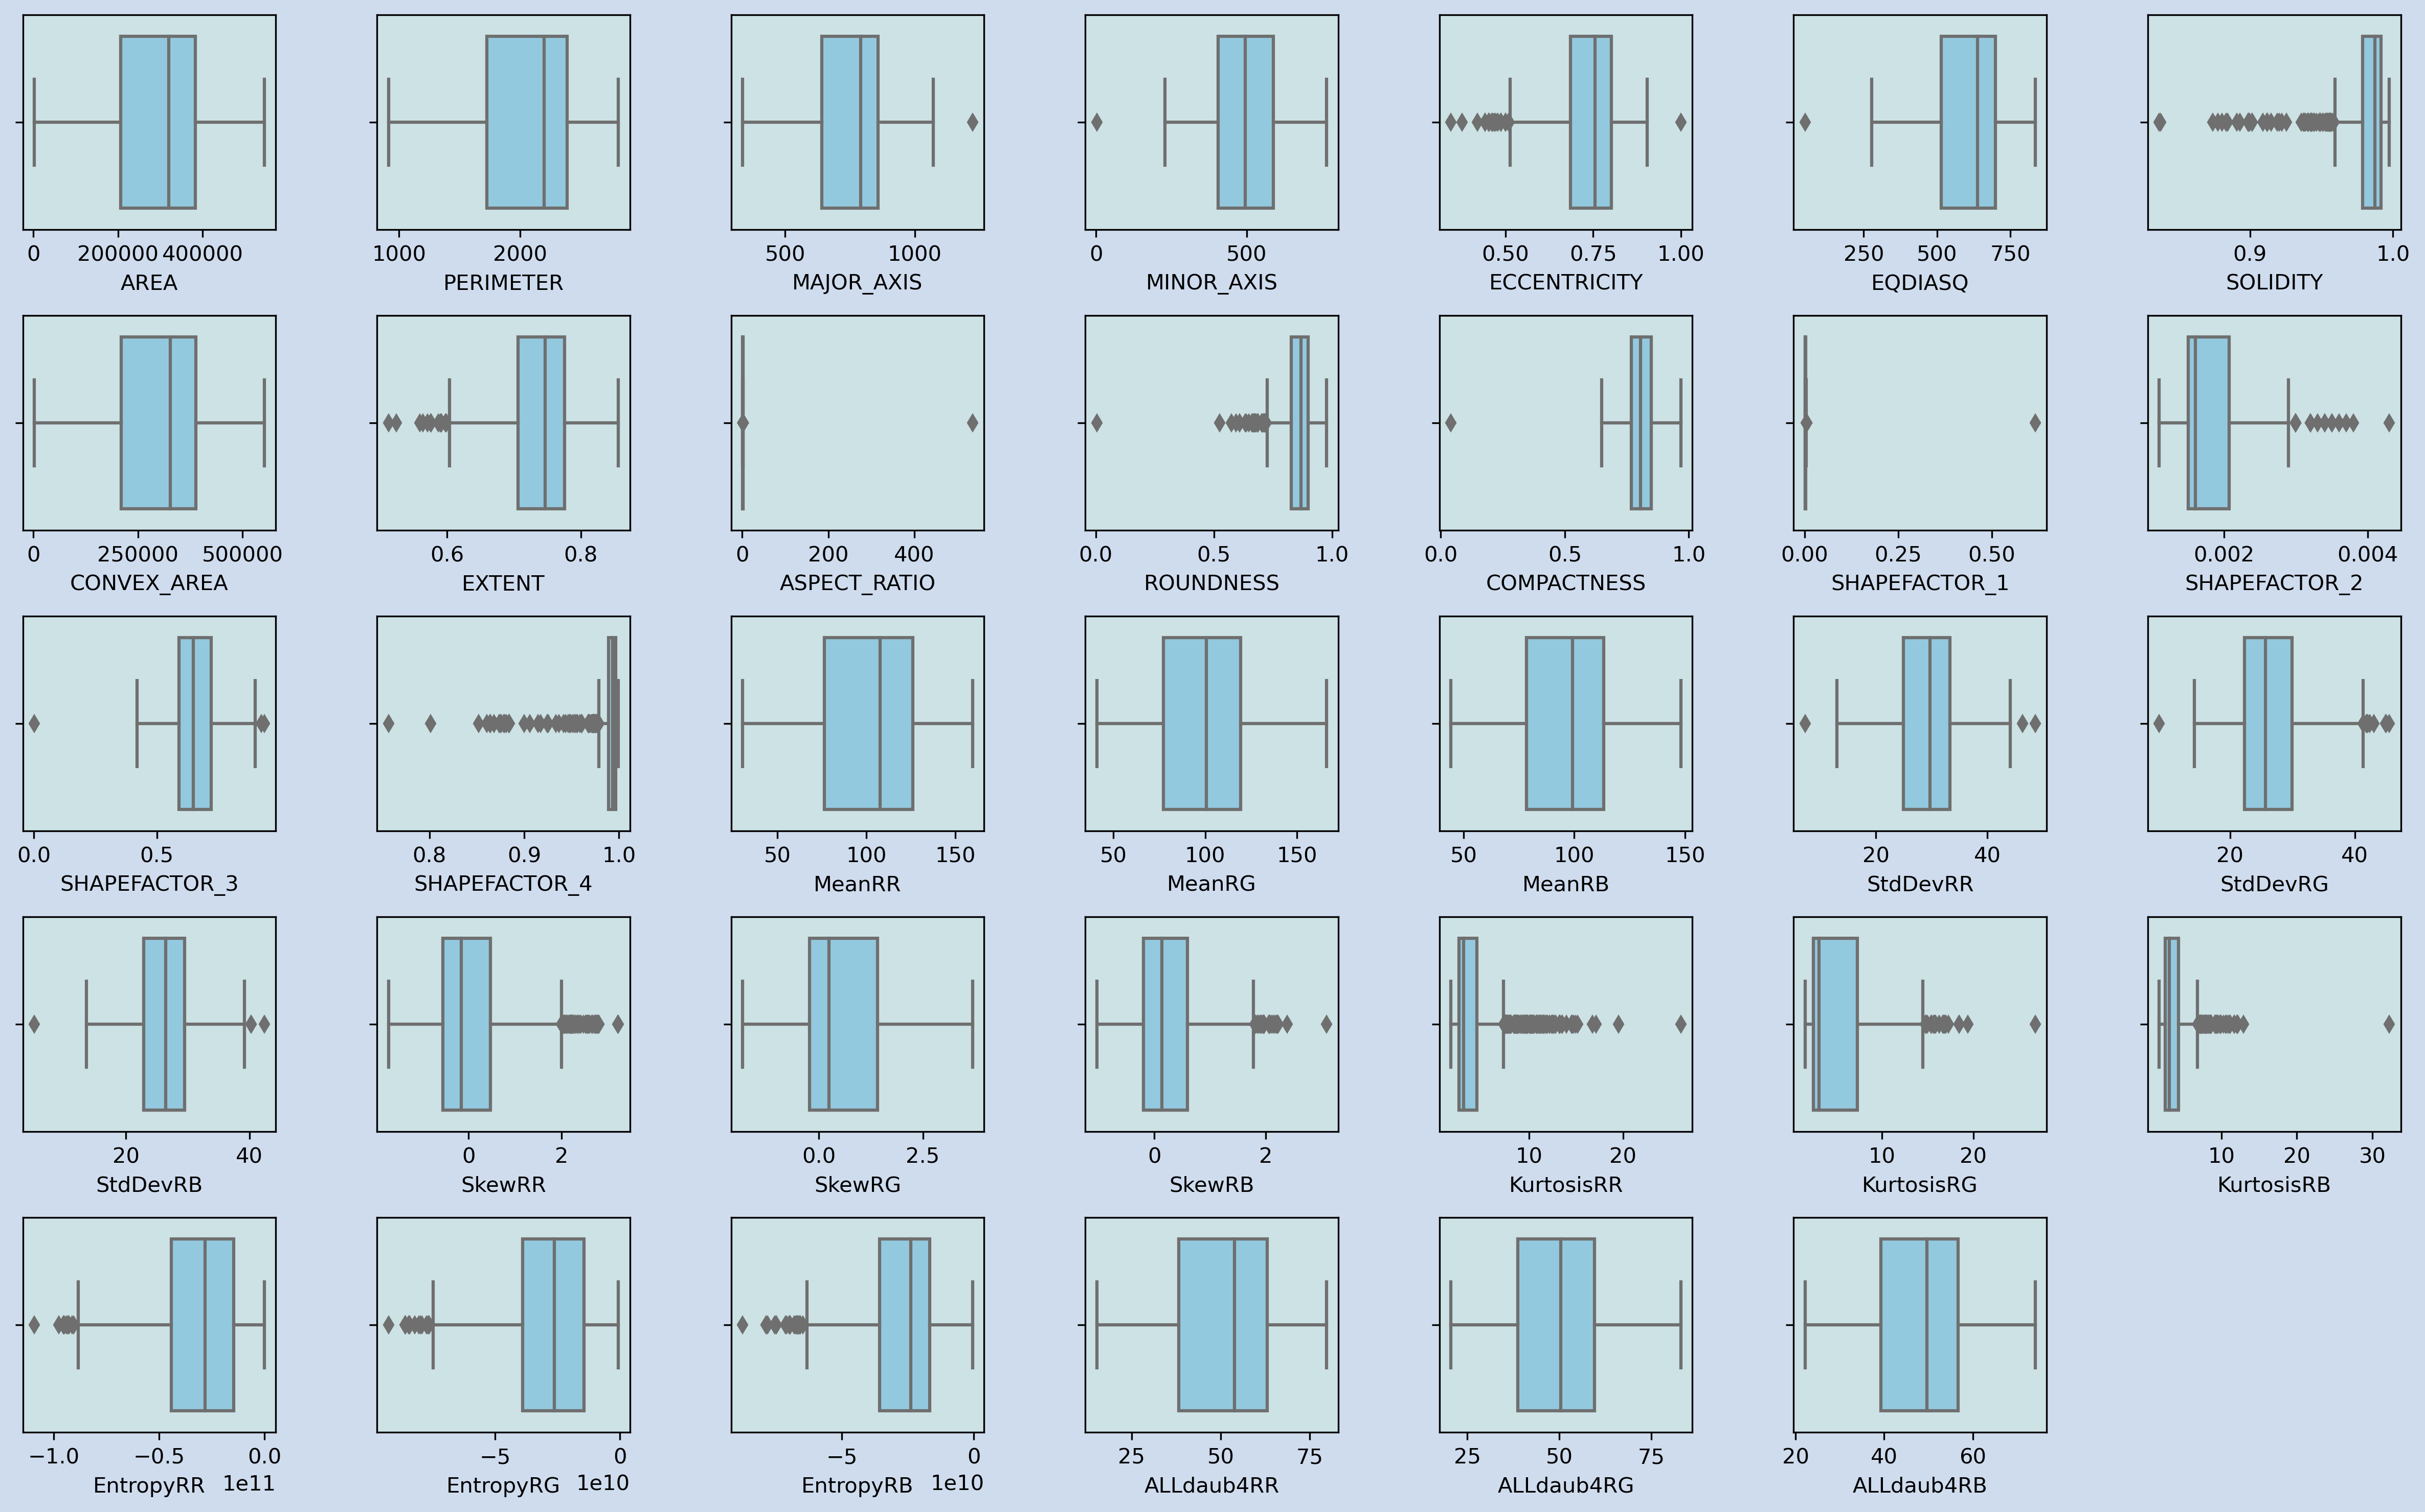

In [9]:
list_col = list(dados.columns)
list_col.remove("Class")

fig = plt.figure(figsize=(20,12), facecolor='#cfdcee')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(list_col):
    ax = fig.add_subplot(5, 7, num +1)
    ax = sns.boxplot(x=dados[column_name], color='skyblue')

/tmp/ipykernel_32/3853071455.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados_corr = dados.corr()


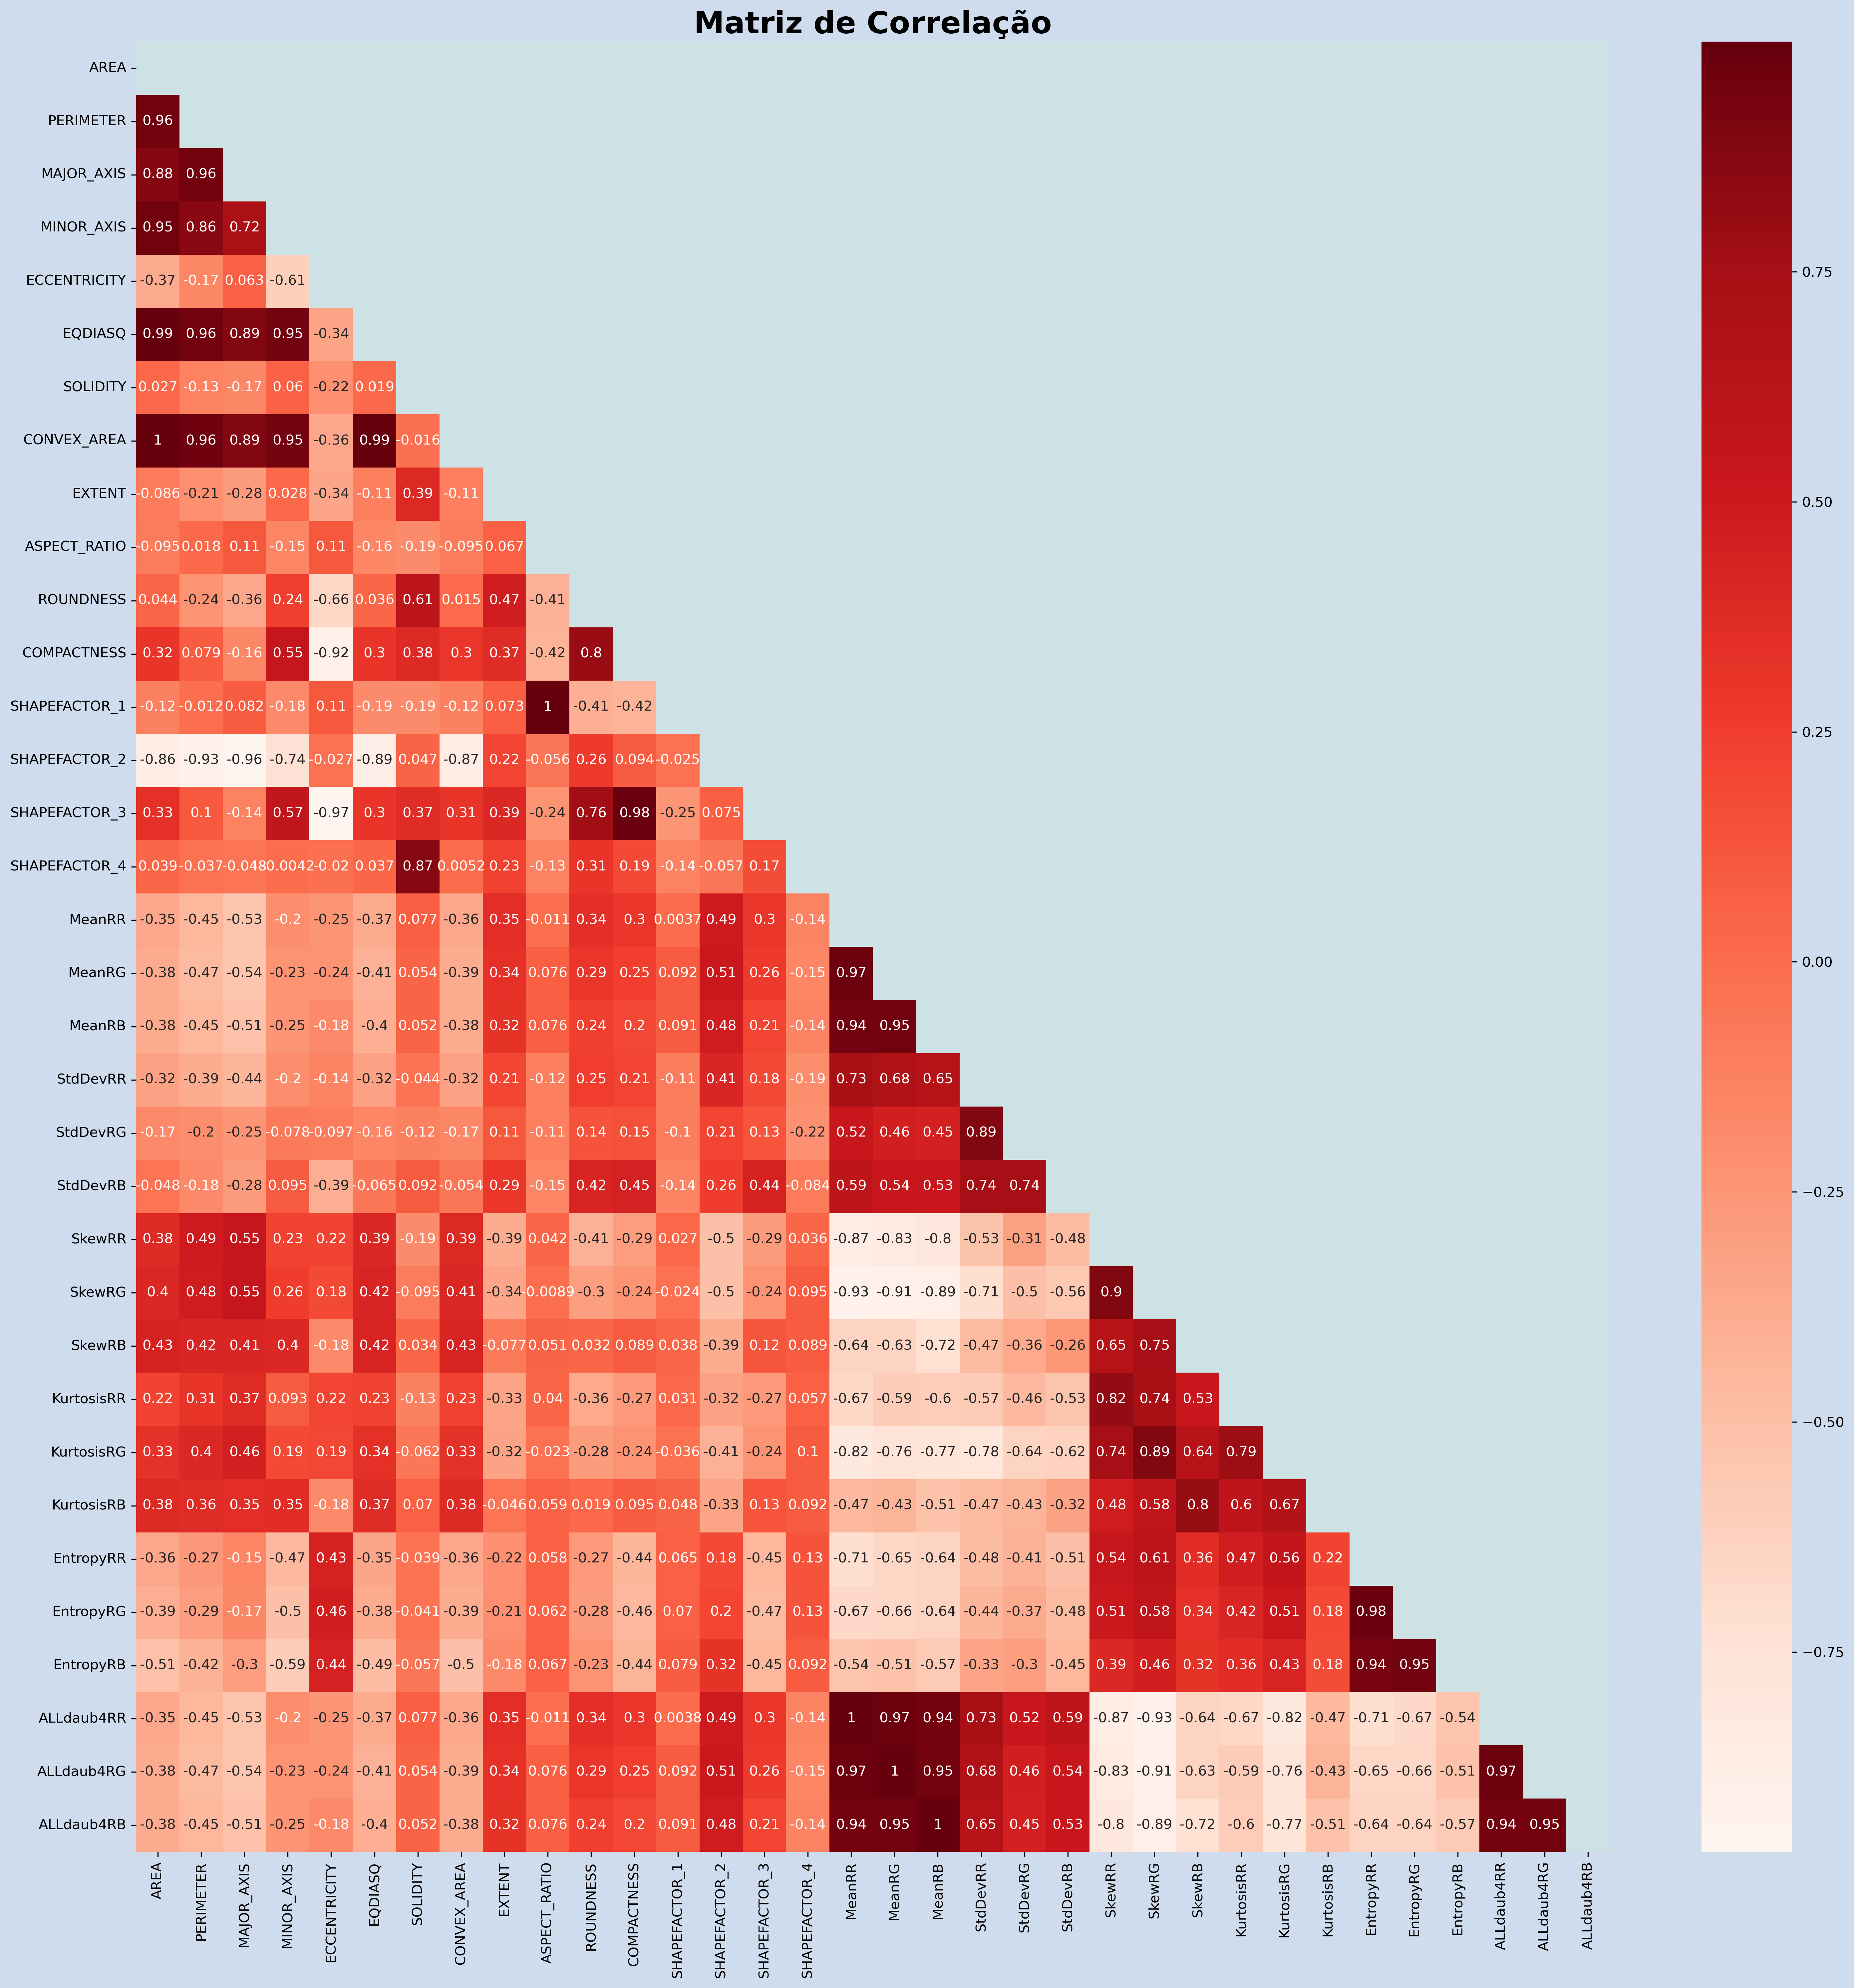

In [10]:
# Plotar uma matriz de gráficos de correlação entre as colunas numéricas
plt.figure(figsize=(20,20), facecolor='#cfdcee')
dados_corr = dados.corr()
mask = np.triu(np.ones_like(dados_corr, dtype=bool))
sns.heatmap(dados_corr, mask=mask, annot=True, cmap="Reds")
plt.title("Matriz de Correlação", size=22, fontweight="bold")
plt.tight_layout()

## 1.1. Avalie os modelos de MLP e de SVM, realizando otimização de hiperparâmetros.

### Otimização de Hiperparâmetros: 

A padronização de conjuntos de dados é um requisito comum para muitos estimadores de aprendizado de máquina implementados no scikit-learn. Eles podem apresentar comportamentos inadequados se as características individuais não se assemelharem, mais ou menos, a dados com distribuição normal padrão: uma distribuição gaussiana com média zero e variância unitária.

Na prática, muitas vezes ignoramos a forma da distribuição e simplesmente transformamos os dados para centralizá-los, removendo o valor médio de cada característica, e em seguida, escalamos dividindo as características não constantes pelo desvio padrão delas.

Por exemplo, muitos elementos usados na função objetivo de um algoritmo de aprendizado (como o kernel RBF das Máquinas de Vetores de Suporte ou os regularizadores l1 e l2 dos modelos lineares) podem assumir que todas as características estão centralizadas em torno de zero ou têm variância na mesma ordem. Se uma característica tiver uma variância que é ordens de magnitude maior do que as outras, ela pode dominar a função objetivo e fazer com que o estimador seja incapaz de aprender corretamente com as outras características, conforme o esperado.

O módulo de pré-processamento fornece a classe utilitária StandardScaler, que é uma maneira rápida e fácil de realizar a seguinte operação em um conjunto de dados semelhante a uma matriz.


https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

## Pré-processamento dos dados

In [11]:
# Separando X de Y 
X = dados.iloc[:, :-1]
y = dados.iloc[:, -1]

In [12]:
# Separando os dados de treino dos dados de teste
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

Treinaremos com 673 elementos e testaremos com 225 elementos


In [13]:
# Escalonando os dados
# A SVC e o MLP utilizam StandardScaler para melhorar suas previsões

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

## Por que escalonar nossos dados? 

A escala dos dados consiste em transformar os atributos numéricos em uma escala com média zero e desvio padrão igual a um (distribuição padrão). Isso é feito através do cálculo da média e do desvio padrão dos dados em cada atributo e, em seguida, subtraindo a média e dividindo pelo desvio padrão para cada valor do atributo.

O escalonamento dos dados pode melhorar o desempenho do modelo de machine learning. Muitos algoritmos, como SVM e redes neurais, são sensíveis à escala dos atributos. A padronização dos dados garante que todos os atributos possuam a mesma ordem de grandeza, evitando que alguns atributos dominem a contribuição do aprendizado sobre outros.

### 1.1.1 Modelo SVM

### SVC

SVC e NuSVC implementam a abordagem "um-contra-um" para classificação multi-classe. No total, são construídos n_classes * (n_classes - 1) / 2 classificadores, e cada um deles treina dados de duas classes. Para fornecer uma interface consistente com outros classificadores, a opção decision_function_shape permite transformar de forma monótona os resultados dos classificadores "um-contra-um" em uma função de decisão "um-contra-o-resto" com formato (n_amostras, n_classes).

Os algoritmos de Máquinas de Vetores de Suporte (SVM) não são invariantes à escala, portanto, é altamente recomendado escalar seus dados. Por exemplo, escalar cada atributo no vetor de entrada X para [0,1] ou [-1,+1], ou padronizá-lo para ter média 0 e variância 1. Observe que a mesma escala deve ser aplicada ao vetor de teste para obter resultados significativos.


https://scikit-learn.org/stable/modules/svm.html#support-vector-machines



In [23]:
#Modelo SVM
modelo_svm = SVC(gamma='auto', 
                 C = 1., 
                 random_state = SEED
                )

# Treinar o modelo com os dados de treinamento
modelo_svm.fit(treino_x, treino_y)

SVC(gamma='auto', random_state=5)

In [24]:
# Fazer previsões com o conjunto de teste
previsoes_svm = modelo_svm.predict(teste_x)

# Calcular a acurácia do modelo
acuracia_svm = accuracy_score(teste_y, previsoes_svm) * 100

print("-------------------------------------")
print("------- A acurácia foi %.2f%% -------" % acuracia_svm)
print("-------------------------------------")

-------------------------------------
------- A acurácia foi 90.67% -------
-------------------------------------


### 1.1.2 Modelo MLP
### Multi-layer Perceptron

O Perceptron Multicamadas (MLP) é um algoritmo de aprendizado supervisionado que aprende uma função "f(\cdot): R^m \rightarrow R^o" através do treinamento em um conjunto de dados, onde "m" é o número de dimensões para a entrada e "o" é o número de dimensões para a saída. Dado um conjunto de características "X = {x_1, x_2, ..., x_m}" e um alvo "y", ele pode aprender um aproximador de função não linear para classificação ou regressão. Ele difere da regressão logística, pois entre a camada de entrada e a camada de saída, pode haver uma ou mais camadas não lineares, chamadas camadas ocultas.

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron

In [25]:
# Usando modelo MLP
INPUTS = 34 # Numero de colunas de X
CLASSES = 7 # Numero de Classes diferentes em y
EPOCHS = 1000 # Numero de épocas máximas que o MLP tenta rodar até convergir

# Criar o modelo da rede MLP
modelo_mlp = MLPClassifier(hidden_layer_sizes = (INPUTS, CLASSES), 
                           alpha = 0.0001,
                           max_iter = EPOCHS, 
                           random_state = SEED
                          )

# Treinar o modelo com os dados de treinamento
modelo_mlp.fit(treino_x, treino_y) # Treinos já escalados com StandardScaler

# Fazer previsões com o conjunto de teste
previsoes_mlp = modelo_mlp.predict(teste_x)


In [27]:
# Calcular a acurácia do modelo
acuracia_mlp = accuracy_score(teste_y, previsoes_mlp) * 100
print("A acurácia foi %.2f%%" % acuracia_mlp)

A acurácia foi 93.33%


In [29]:
# Relatório de Classificação
classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']
print("\nRelatório de Classificação com SVM:")
print(classification_report(teste_y, previsoes_svm, target_names=classes))


print("\nRelatório de Classificação com MLP:")
print(classification_report(teste_y, previsoes_mlp, target_names=classes))



Relatório de Classificação com SVM:
              precision    recall  f1-score   support

       BERHI       1.00      0.75      0.86        16
      DEGLET       0.86      0.72      0.78        25
       DOKOL       0.92      0.96      0.94        51
      IRAQUI       0.84      0.89      0.86        18
      ROTANA       0.91      1.00      0.95        42
      SAFAVI       1.00      0.94      0.97        50
       SOGAY       0.74      0.87      0.80        23

    accuracy                           0.91       225
   macro avg       0.90      0.88      0.88       225
weighted avg       0.91      0.91      0.91       225


Relatório de Classificação com MLP:
              precision    recall  f1-score   support

       BERHI       1.00      0.88      0.93        16
      DEGLET       0.95      0.80      0.87        25
       DOKOL       0.94      1.00      0.97        51
      IRAQUI       0.94      0.89      0.91        18
      ROTANA       0.89      1.00      0.94        42
    

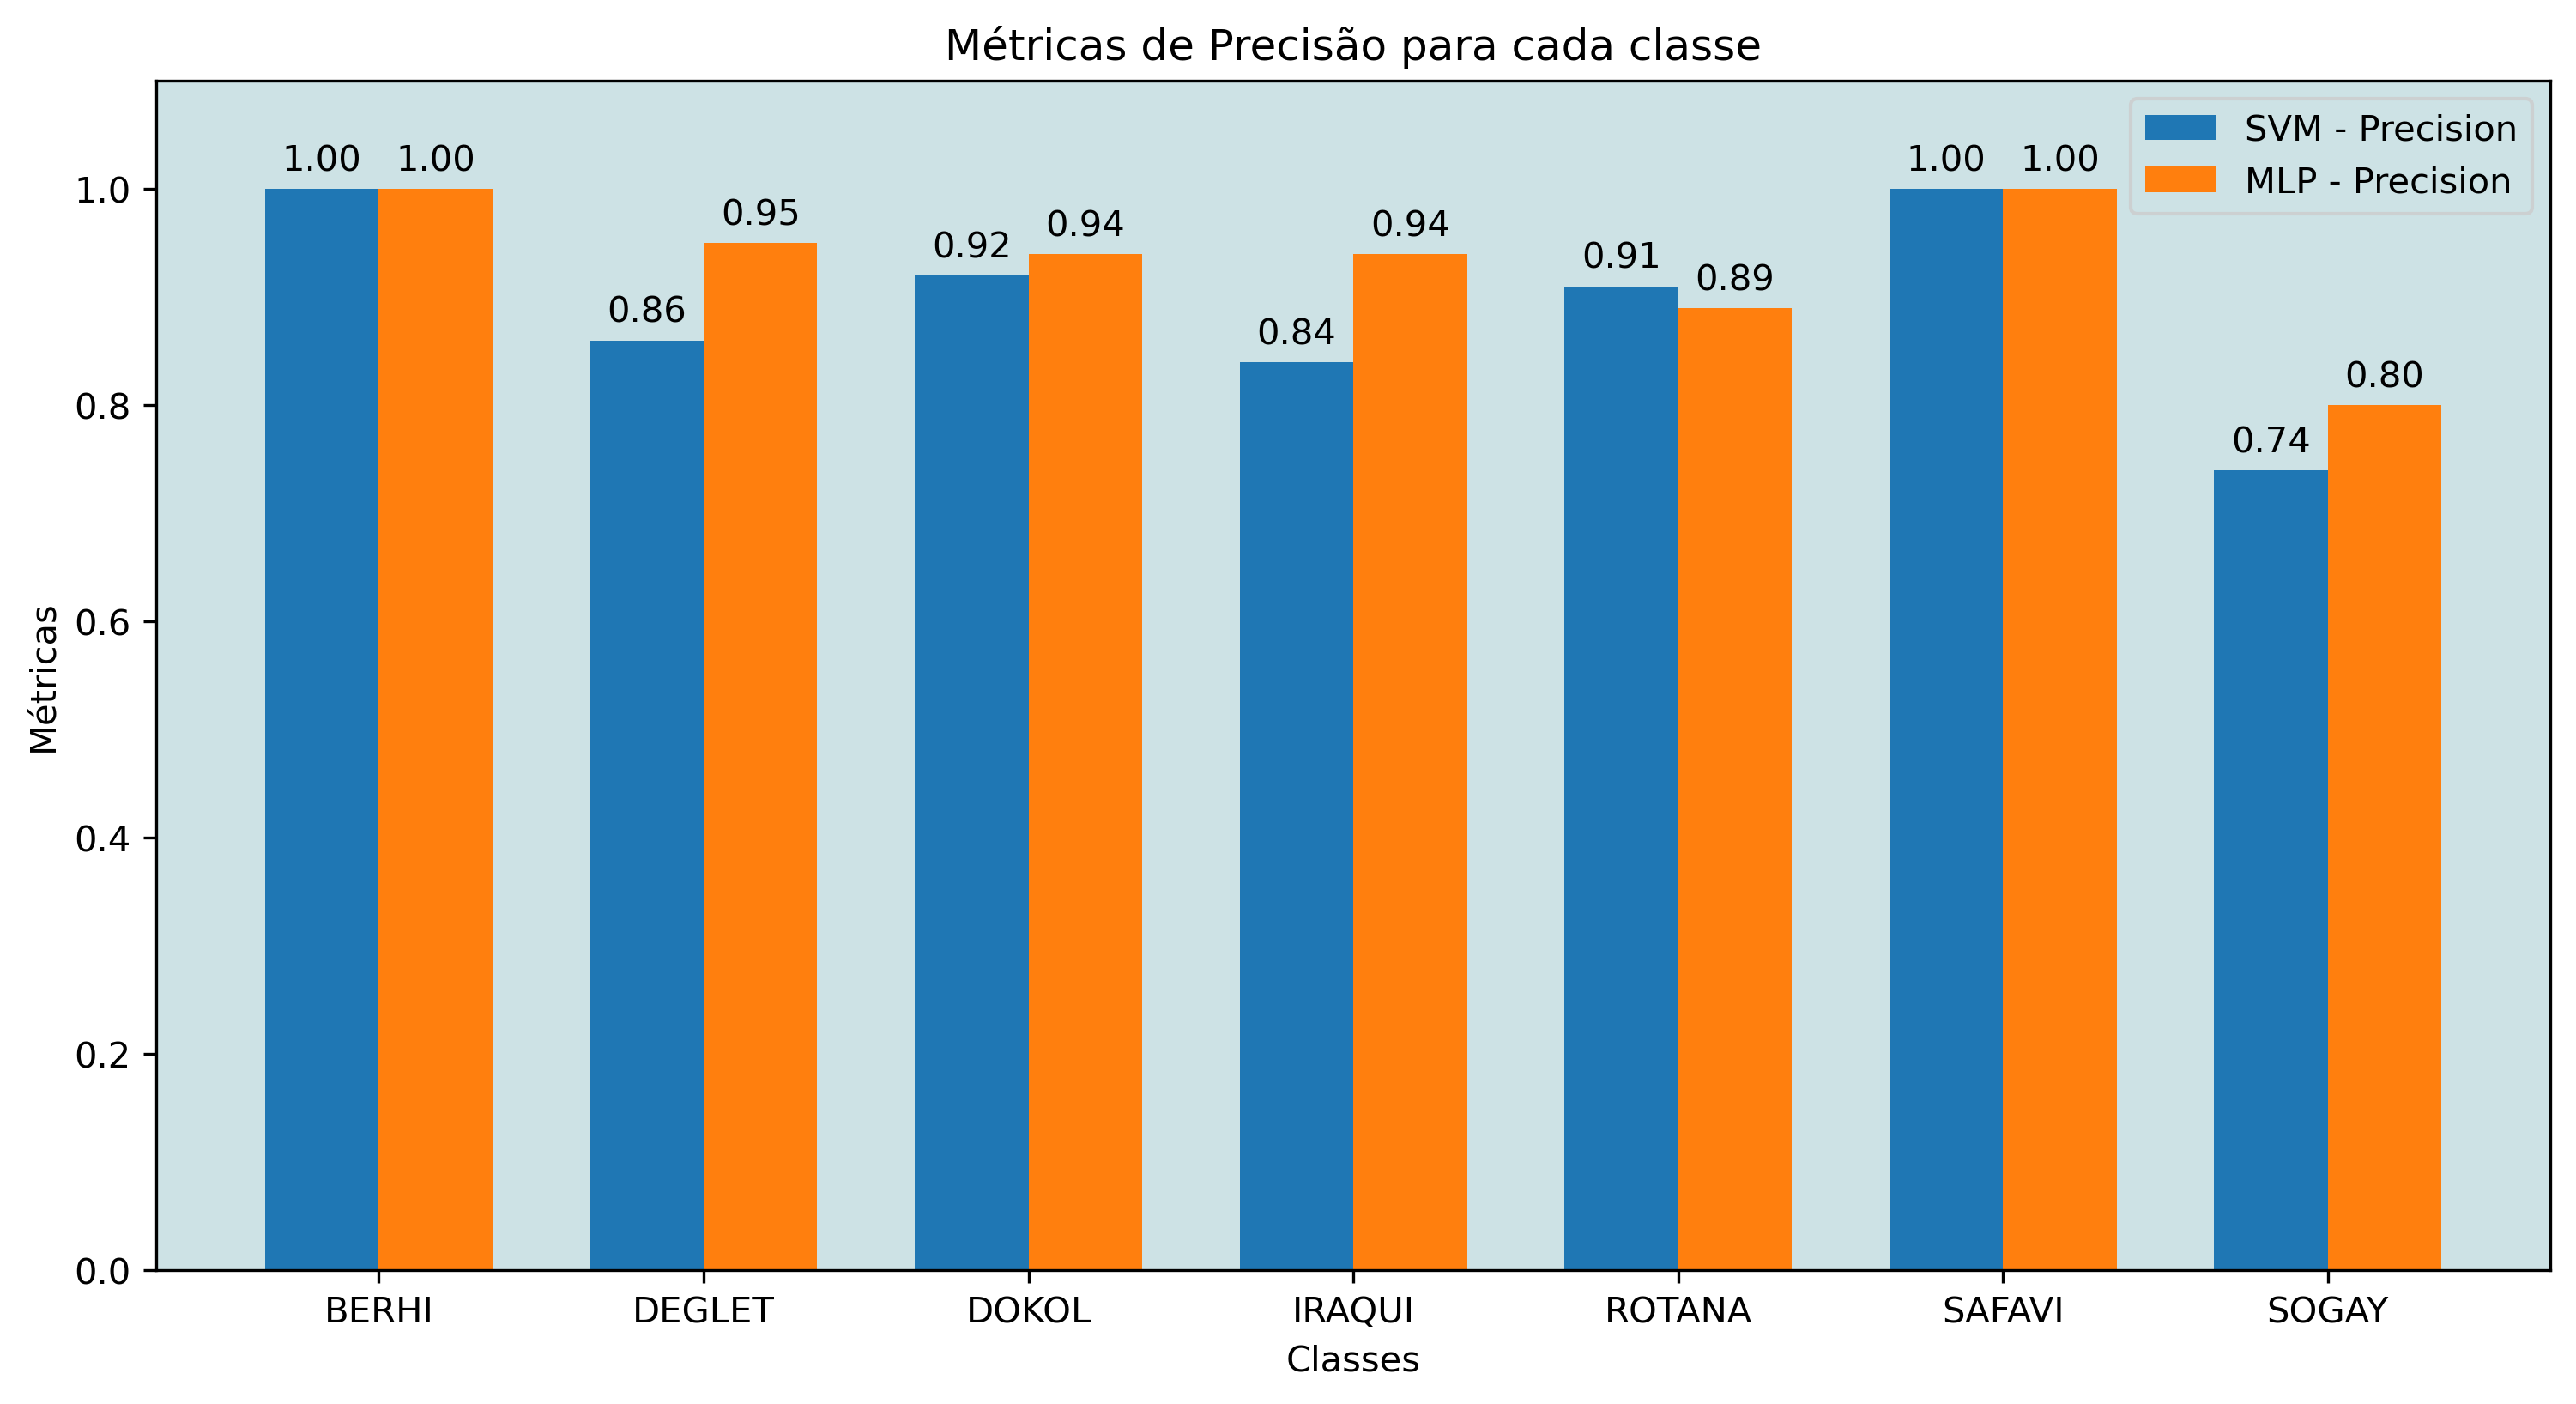

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Relatório de Classificação para SVM
svm_precision = [1.00, 0.86, 0.92, 0.84, 0.91, 1.00, 0.74]
svm_recall = [0.75, 0.72, 0.96, 0.89, 1.00, 0.94, 0.87]
svm_f1_score = [0.86, 0.78, 0.94, 0.86, 0.95, 0.97, 0.80]

# Relatório de Classificação para MLP
mlp_precision = [1.00, 0.95, 0.94, 0.94, 0.89, 1.00, 0.80]
mlp_recall = [0.88, 0.80, 1.00, 0.89, 1.00, 0.94, 0.87]
mlp_f1_score = [0.93, 0.87, 0.97, 0.91, 0.94, 0.97, 0.83]

classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']

# Configurações do gráfico
ind = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(ind - width/2, svm_precision, width, label='SVM - Precision')
rects2 = ax.bar(ind + width/2, mlp_precision, width, label='MLP - Precision')

ax.set_xlabel('Classes')
ax.set_ylabel('Métricas')
ax.set_title('Métricas de Precisão para cada classe')
ax.set_xticks(ind)
ax.set_xticklabels(classes)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)
plt.show()


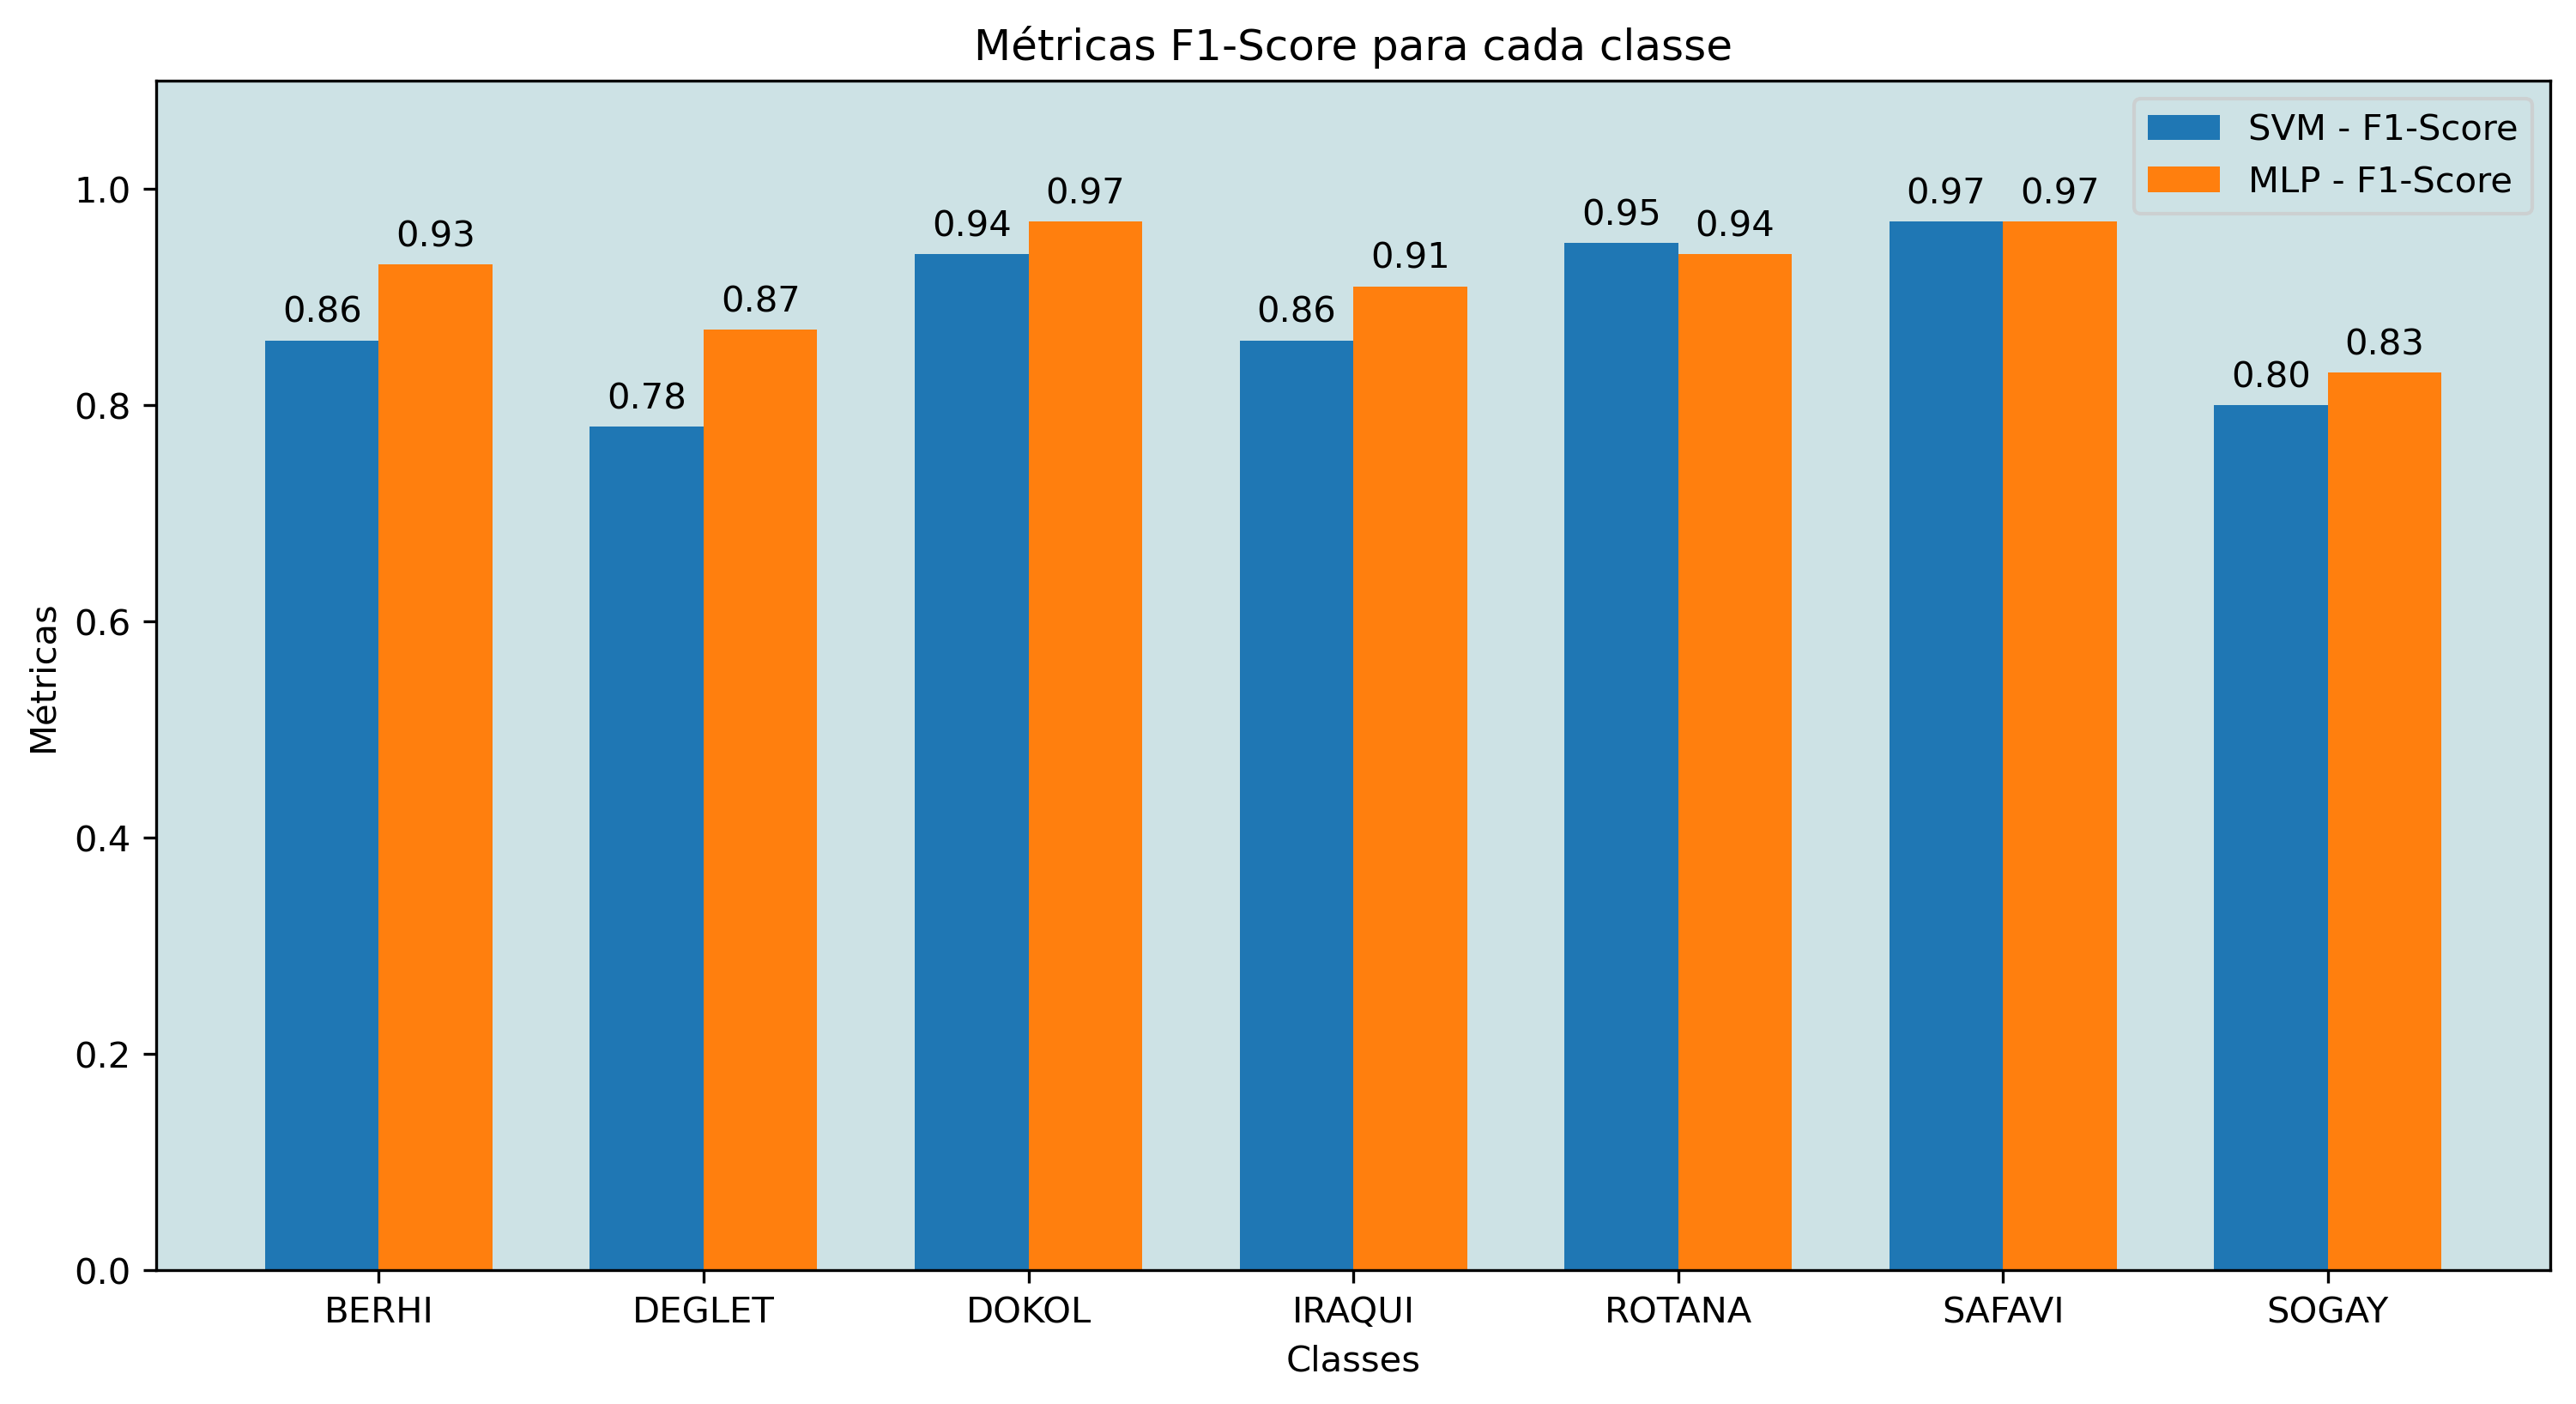

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Relatório de Classificação para SVM
svm_f1_score = [0.86, 0.78, 0.94, 0.86, 0.95, 0.97, 0.80]

# Relatório de Classificação para MLP
mlp_f1_score = [0.93, 0.87, 0.97, 0.91, 0.94, 0.97, 0.83]

classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']

# Configurações do gráfico
ind = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(ind - width/2, svm_f1_score, width, label='SVM - F1-Score')
rects2 = ax.bar(ind + width/2, mlp_f1_score, width, label='MLP - F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Métricas')
ax.set_title('Métricas F1-Score para cada classe')
ax.set_xticks(ind)
ax.set_xticklabels(classes)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)
plt.show()


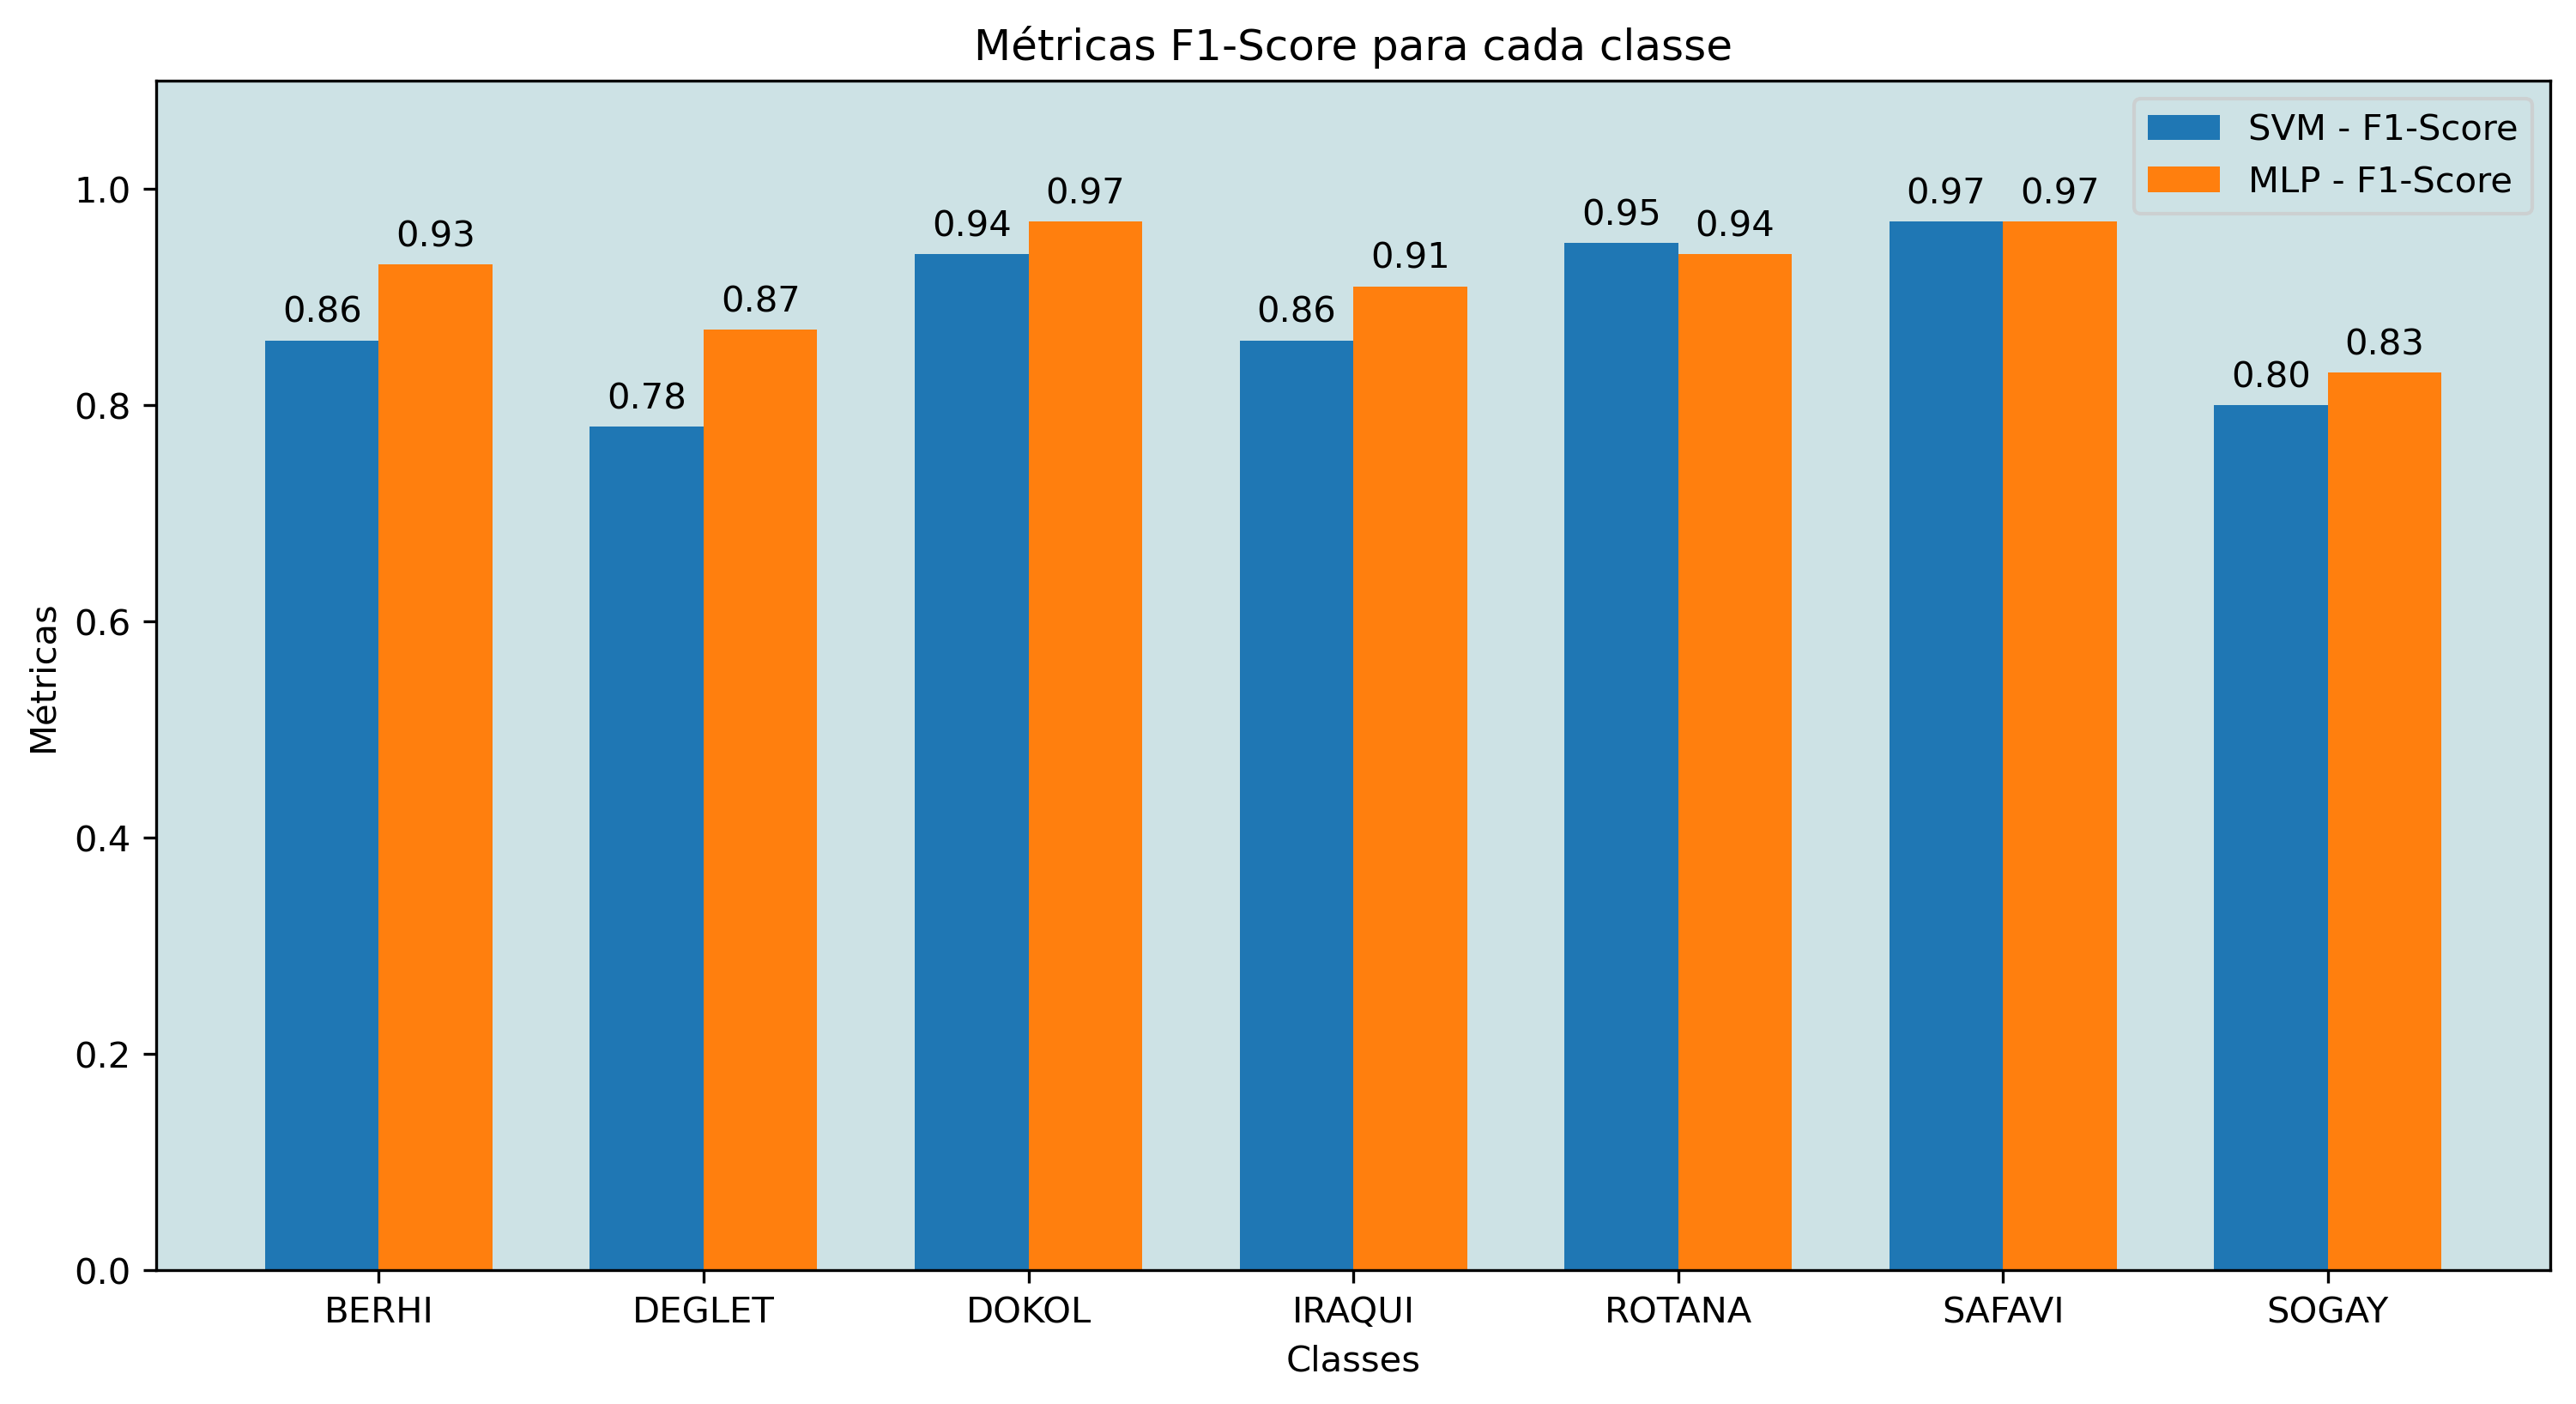

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Relatório de Classificação para SVM
svm_f1_score = [0.86, 0.78, 0.94, 0.86, 0.95, 0.97, 0.80]

# Relatório de Classificação para MLP
mlp_f1_score = [0.93, 0.87, 0.97, 0.91, 0.94, 0.97, 0.83]

classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']

# Configurações do gráfico
ind = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(ind - width/2, svm_f1_score, width, label='SVM - F1-Score')
rects2 = ax.bar(ind + width/2, mlp_f1_score, width, label='MLP - F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Métricas')
ax.set_title('Métricas F1-Score para cada classe')
ax.set_xticks(ind)
ax.set_xticklabels(classes)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)
plt.show()


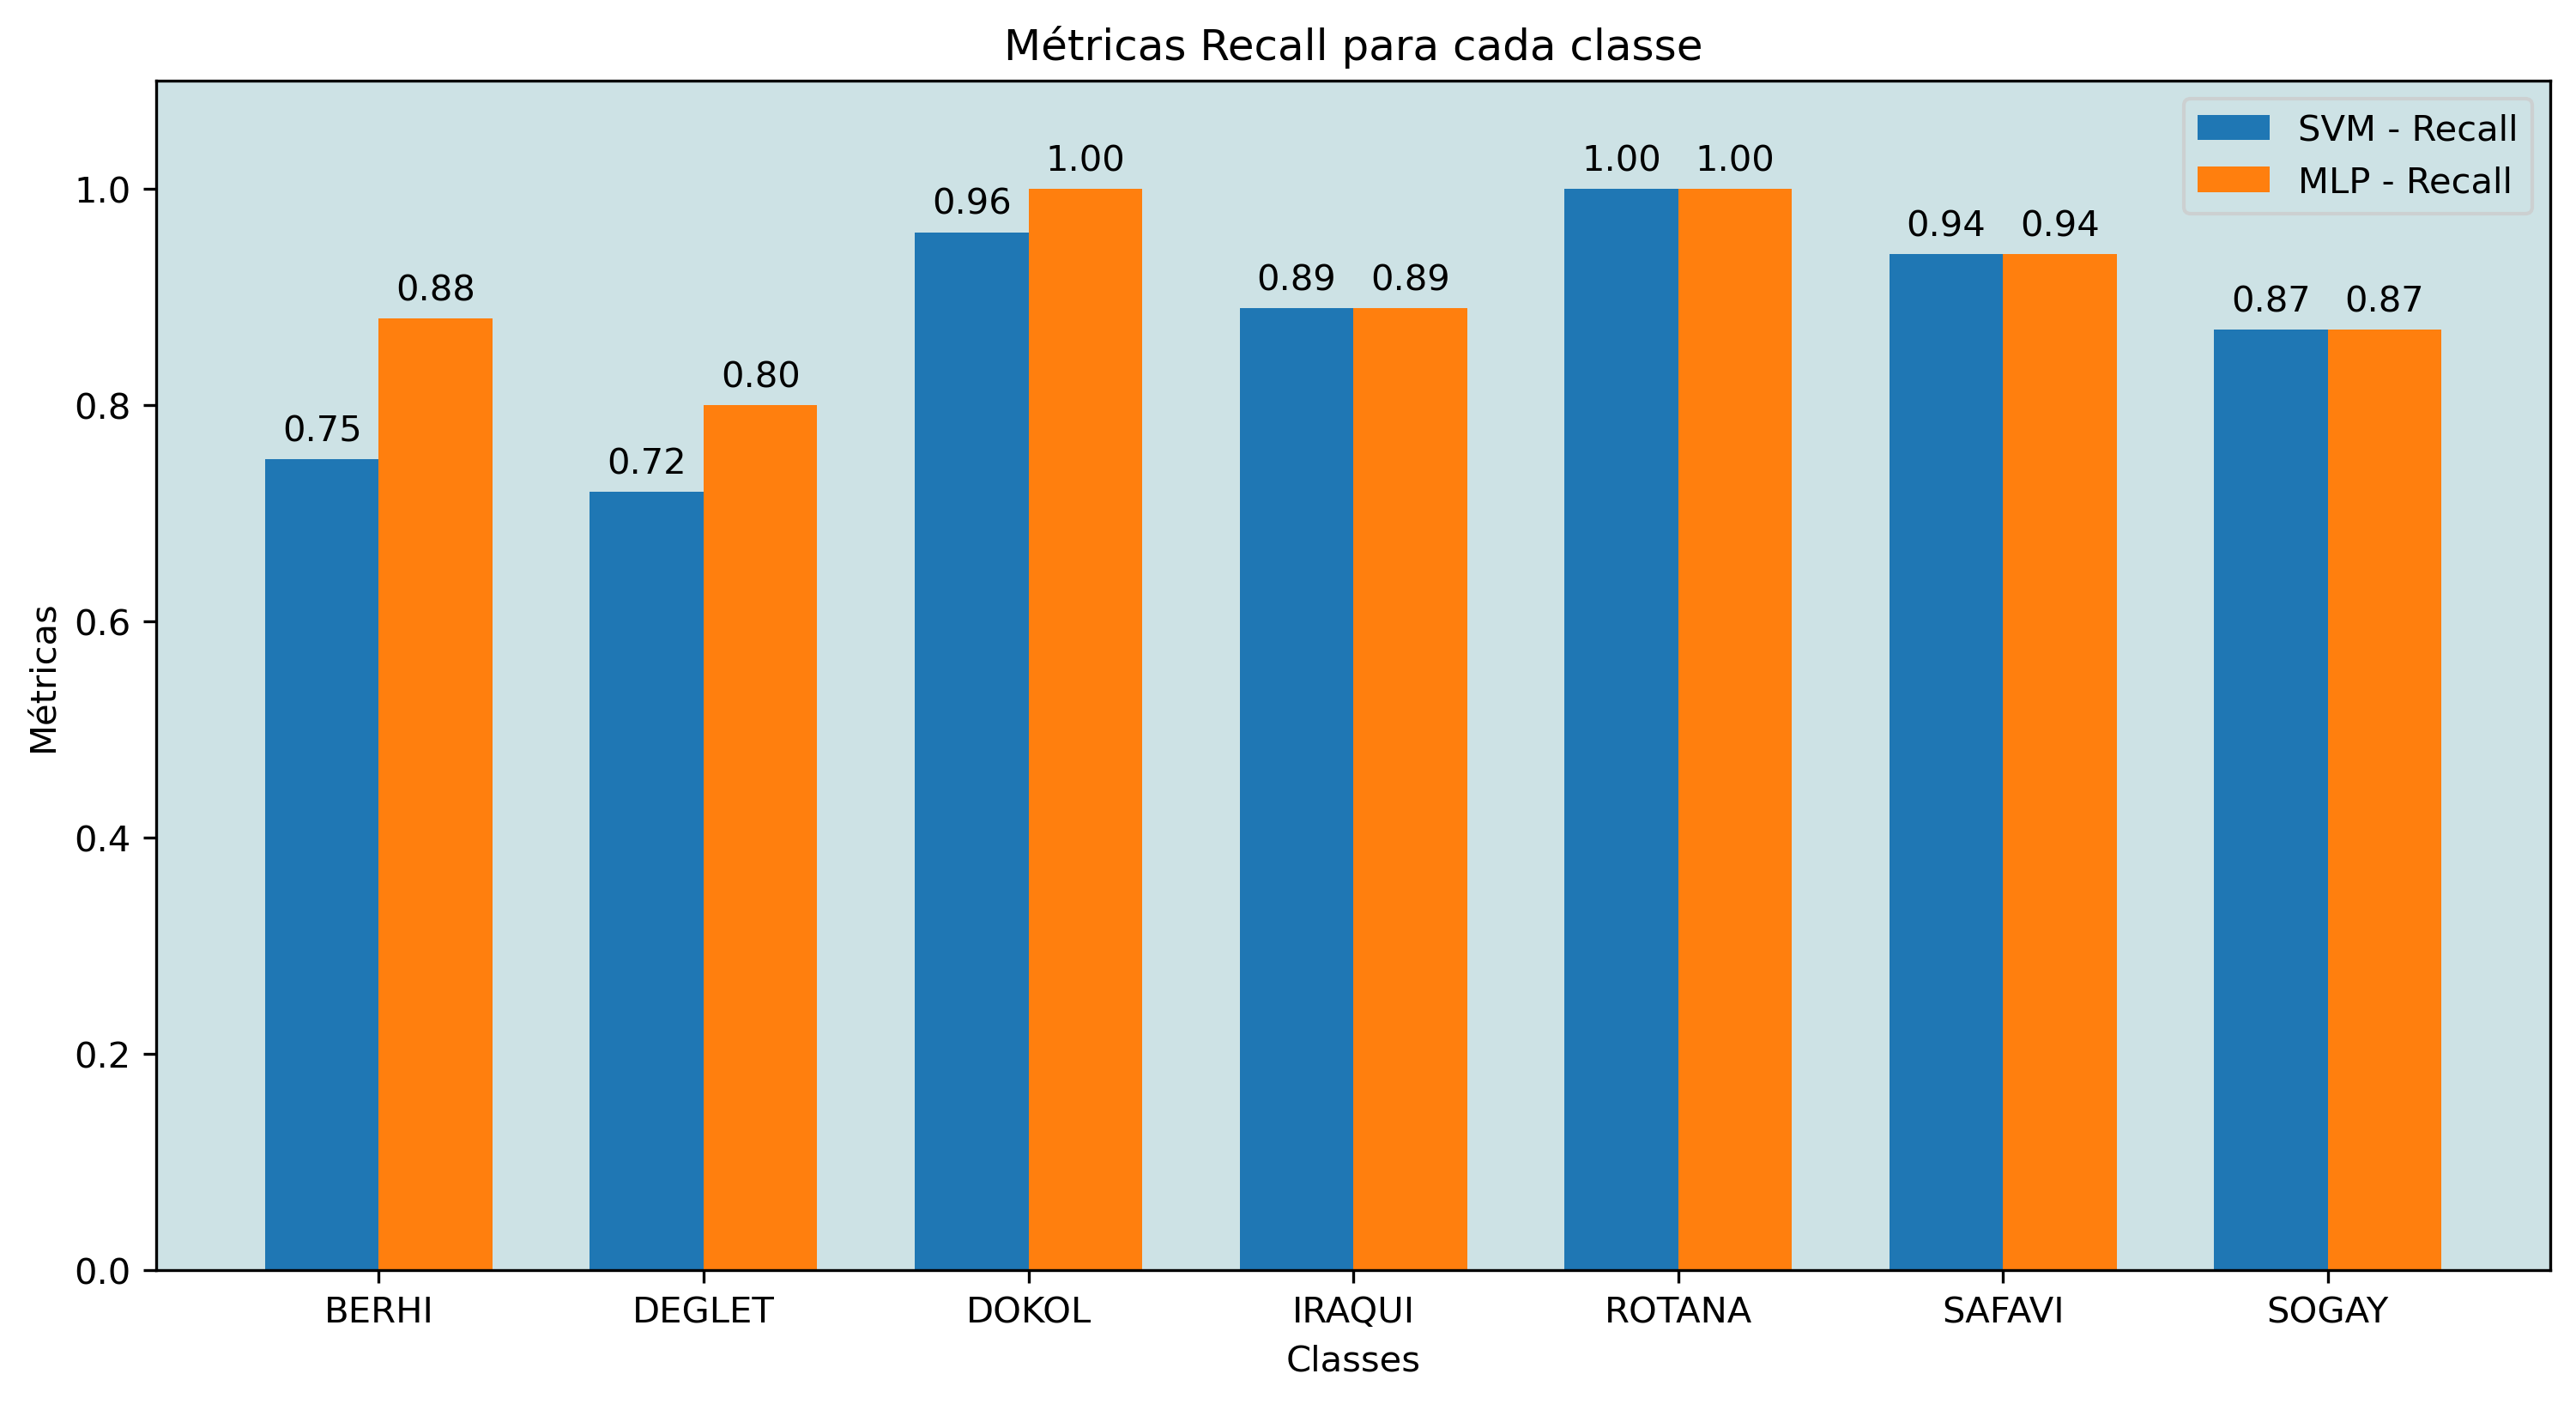

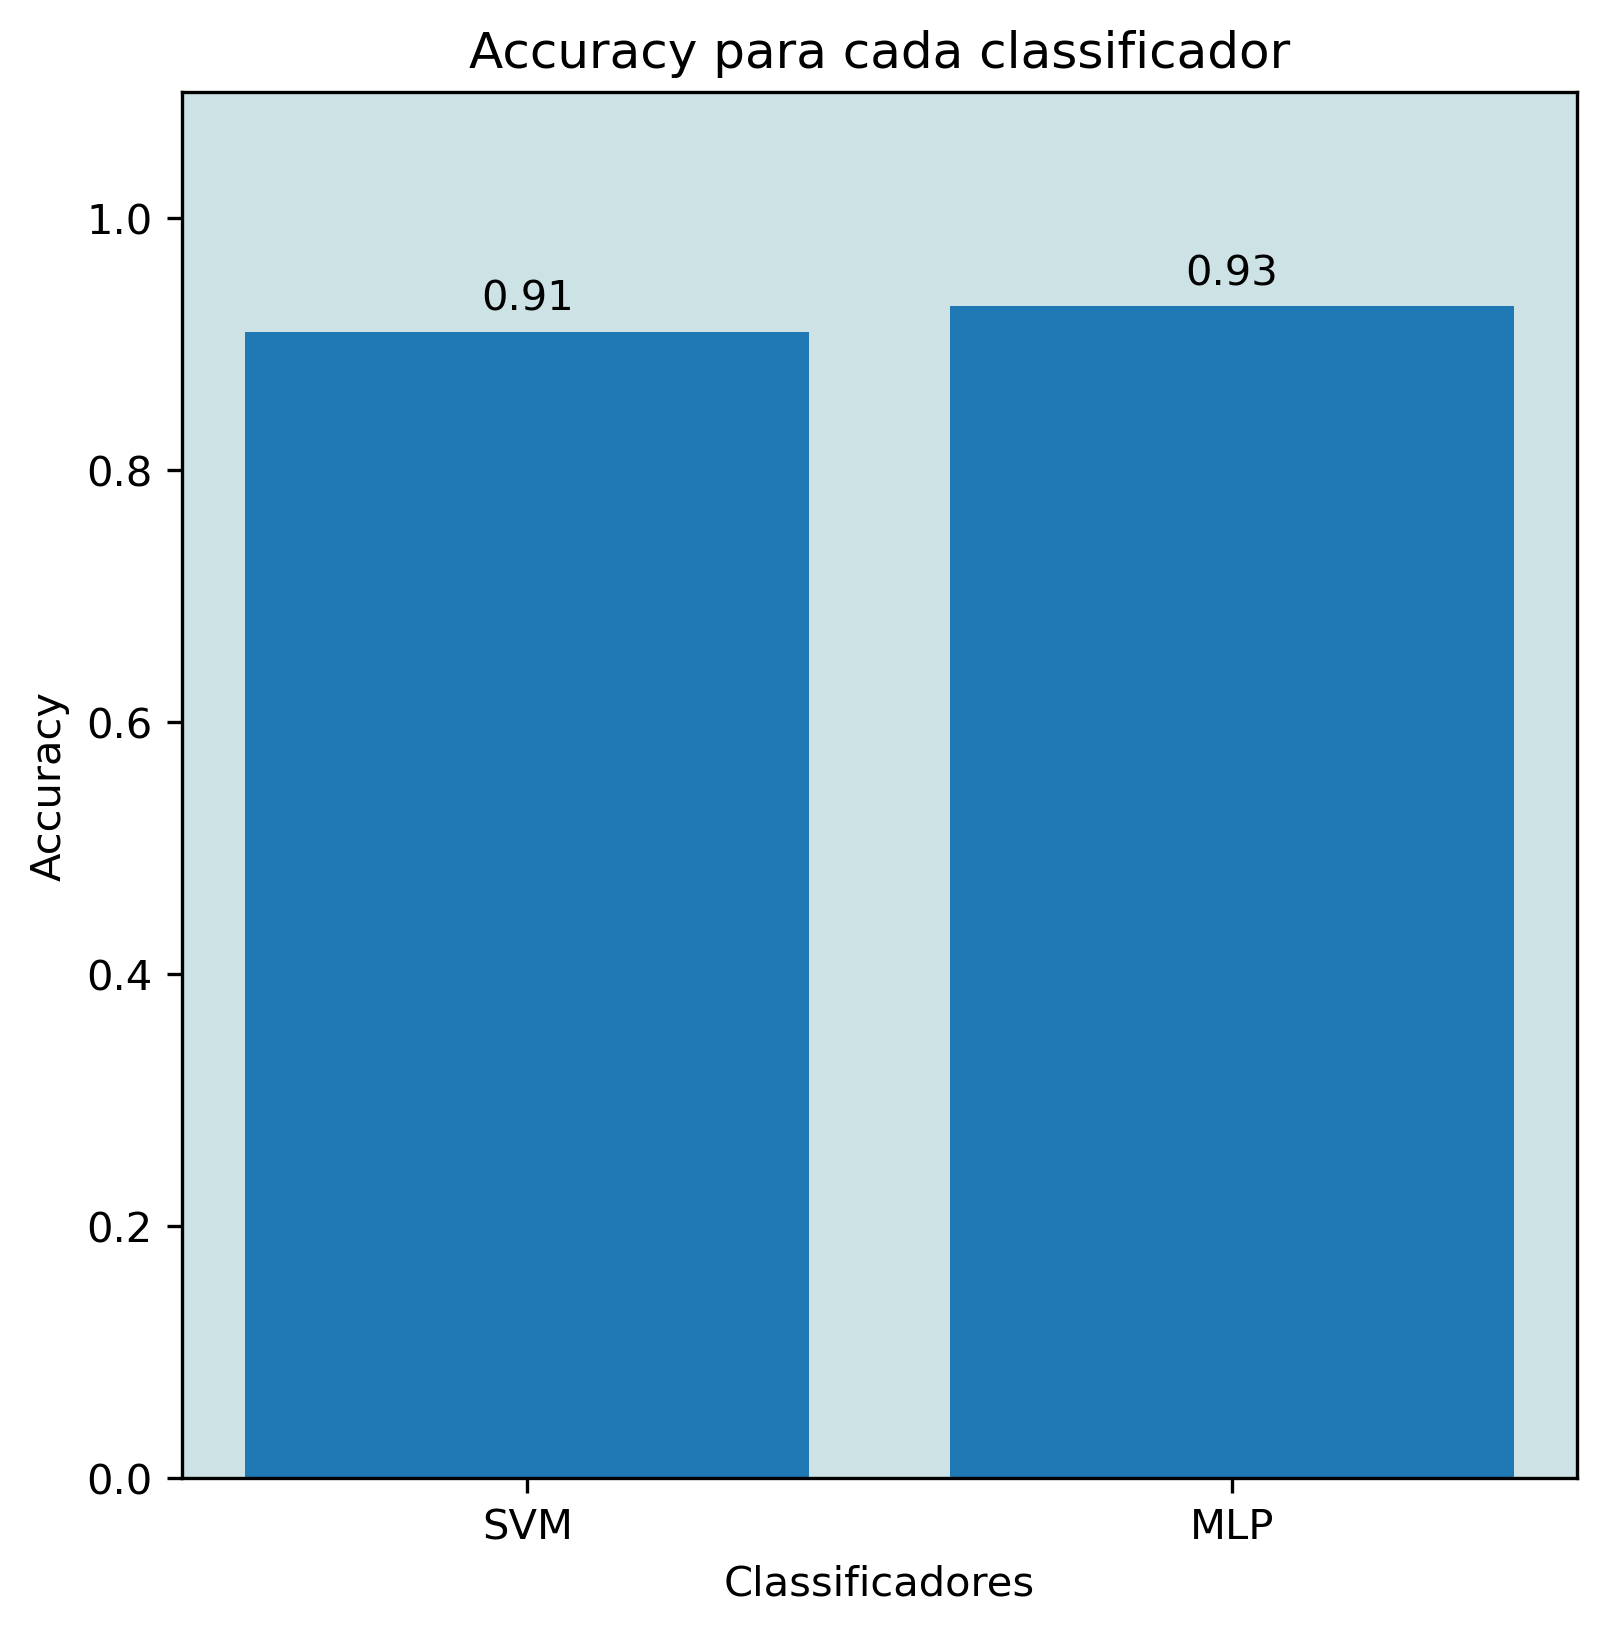

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Relatório de Classificação para SVM
svm_recall = [0.75, 0.72, 0.96, 0.89, 1.00, 0.94, 0.87]
svm_accuracy = 0.91

# Relatório de Classificação para MLP
mlp_recall = [0.88, 0.80, 1.00, 0.89, 1.00, 0.94, 0.87]
mlp_accuracy = 0.93

classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']

# Configurações do gráfico para Recall
ind = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(ind - width/2, svm_recall, width, label='SVM - Recall')
rects2 = ax.bar(ind + width/2, mlp_recall, width, label='MLP - Recall')

ax.set_xlabel('Classes')
ax.set_ylabel('Métricas')
ax.set_title('Métricas Recall para cada classe')
ax.set_xticks(ind)
ax.set_xticklabels(classes)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)
plt.show()


# Configuração do gráfico para Accuracy
fig, ax = plt.subplots(figsize=(6, 6))

accuracy_values = [svm_accuracy, mlp_accuracy]

rects = ax.bar(['SVM', 'MLP'], accuracy_values)

ax.set_xlabel('Classificadores')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy para cada classificador')
ax.set_ylim(0, 1.1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.show()


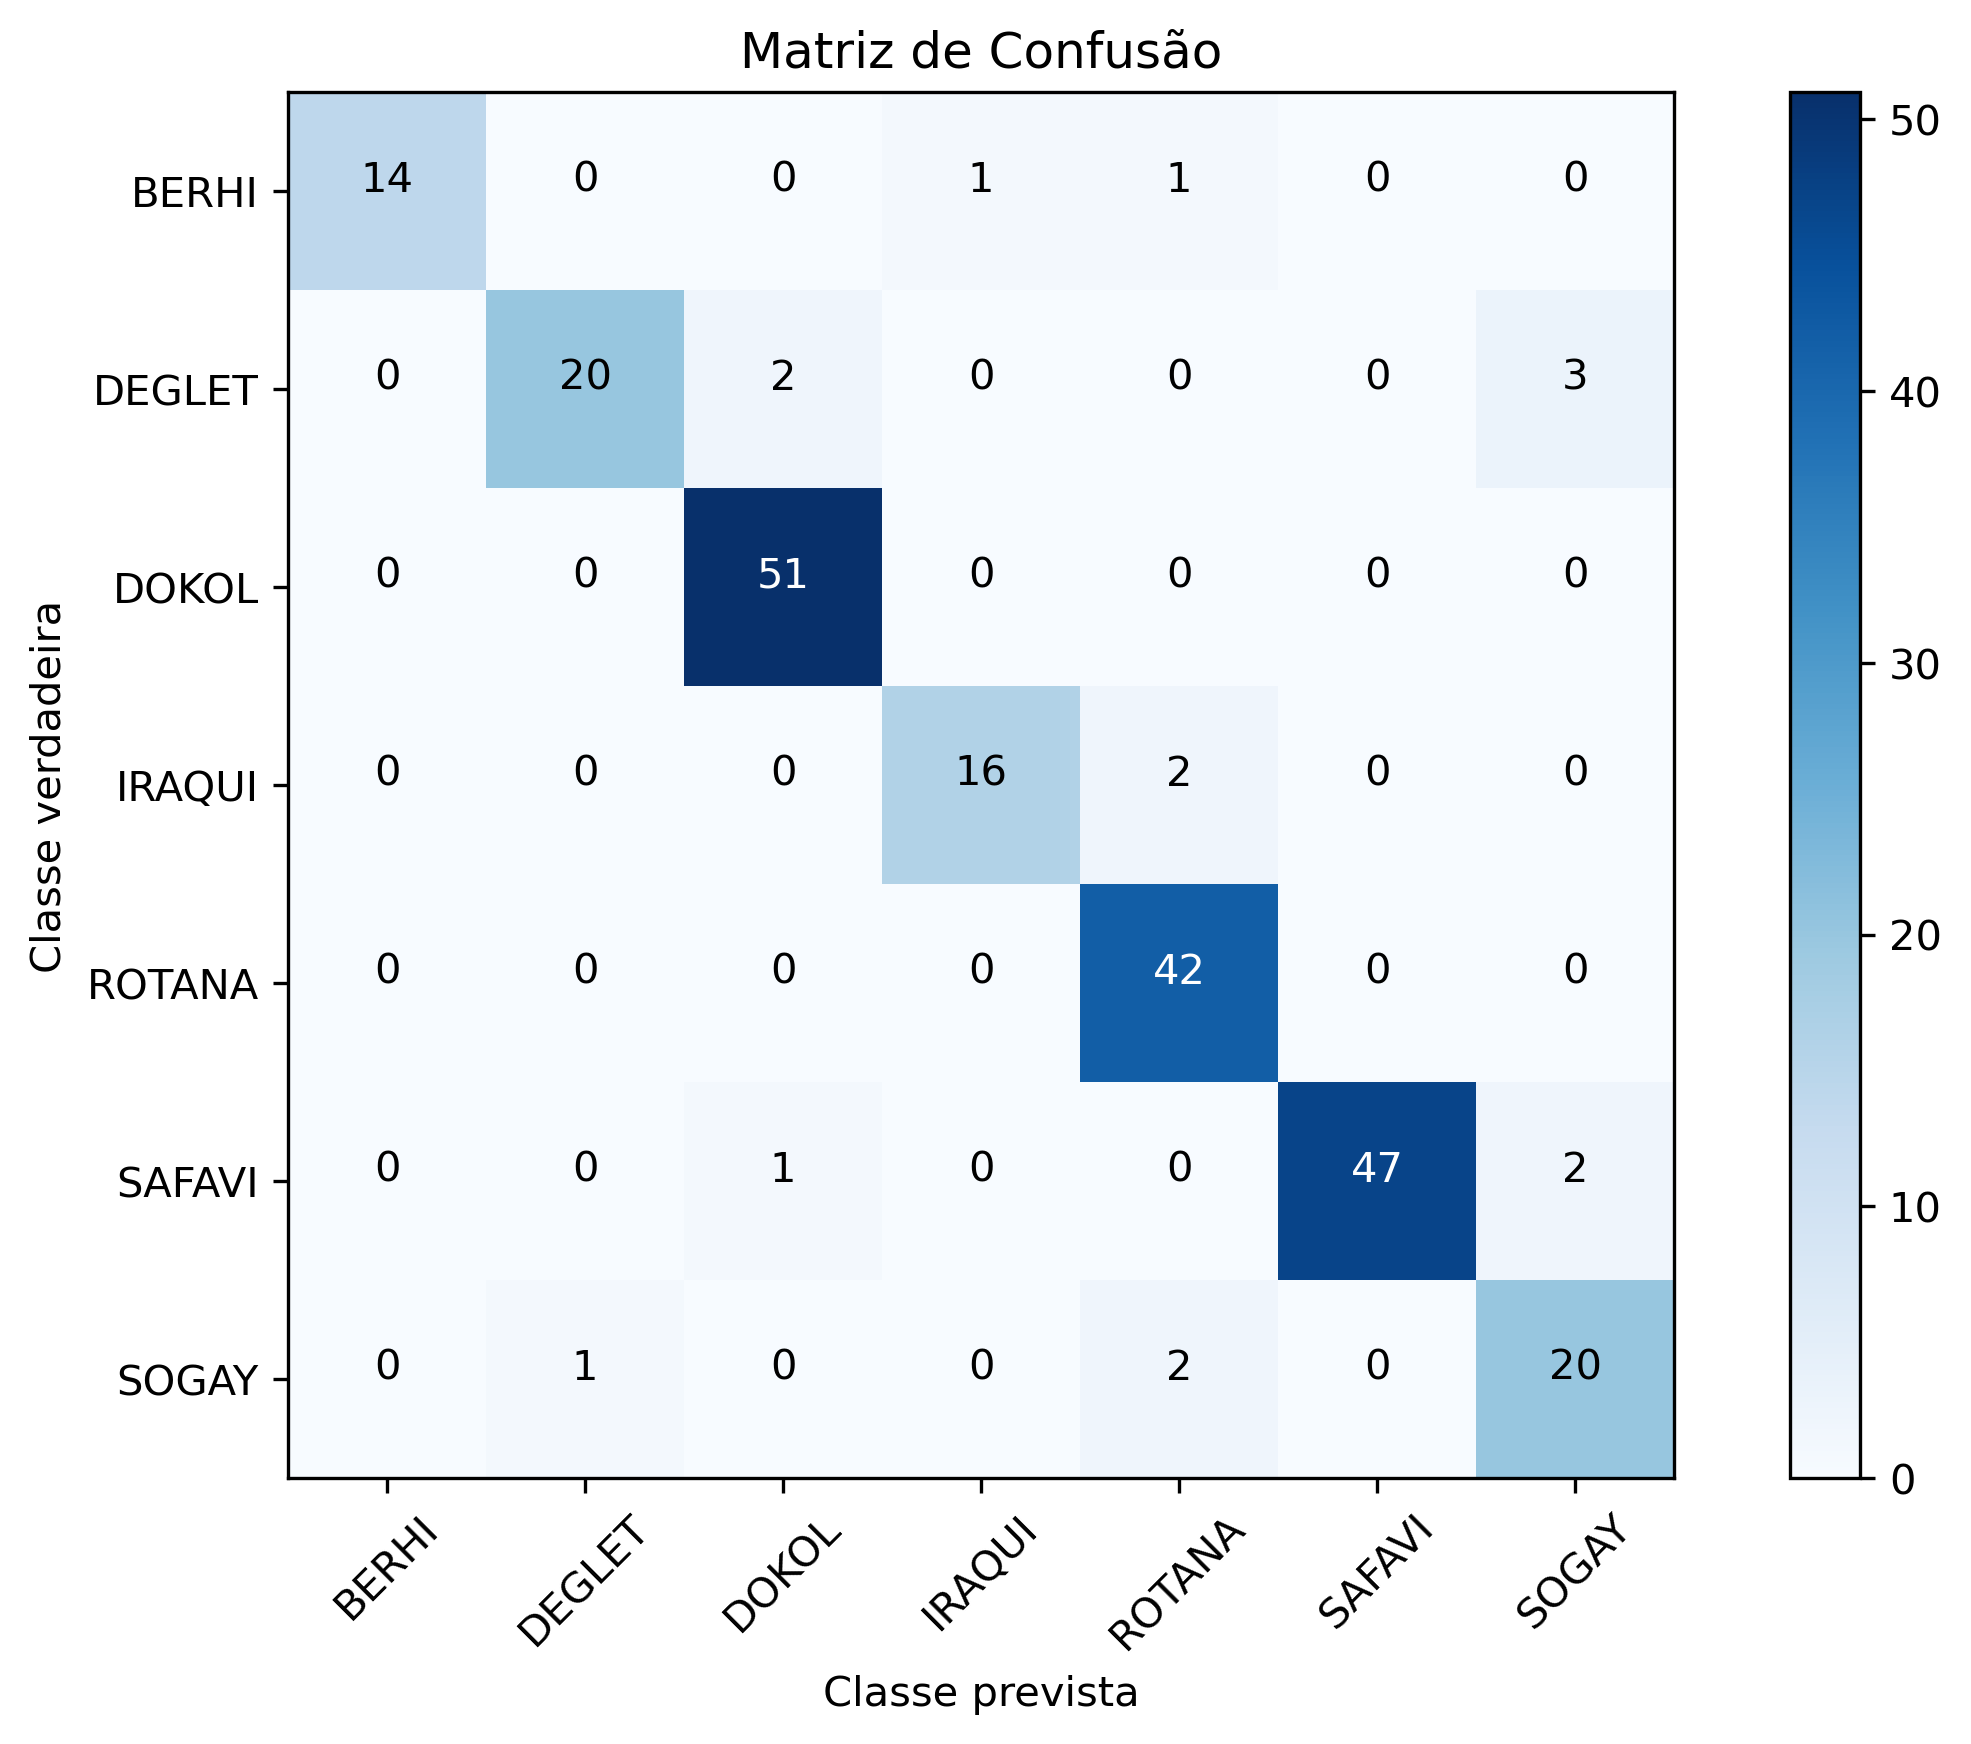

In [19]:
from sklearn.metrics import confusion_matrix

# Função para plotar a matriz de confusão.

def plot_confusion_matrix(cm, classes):
    """
    Plota uma matriz de confusão.

    Args:
        cm (numpy.array): Matriz de confusão.
        classes (list): Lista de rótulos de classe.

    Returns:
        None
    """
    cmap = plt.cm.Blues
    plt.figure(figsize=(10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')
    plt.title('Matriz de Confusão')
    plt.show()
    
# Parametros
valores_verdadeiros = teste_y
valores_preditos = previsoes_mlp

# Matriz de Confusão 
cm = confusion_matrix(valores_verdadeiros, valores_preditos)
classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']
plot_confusion_matrix(cm, classes)

# Análise da SVM e da MLP 

# Item 2. Interpretação dos modelos

## 2.1 

Selecione o melhor modelo MLP e o modelo SVM treinados na etapa anterior e aplique pelo menos duas técnicas de interpretabilidade, como:
* Feature importante: discuta que características foram mais importantes para o modelo;

* Local surrogate ou Shapley: apresente pelo menos dois exemplos a serem explicados e gere as explicações com o LIME; 



## 2.1.1 Feature Importance:

Para obter as características mais importantes para o modelo MLP, você pode usar o atributo feature_importances_ de um modelo treinado com a classe MLPClassifier do scikit-learn. Aqui está um exemplo:


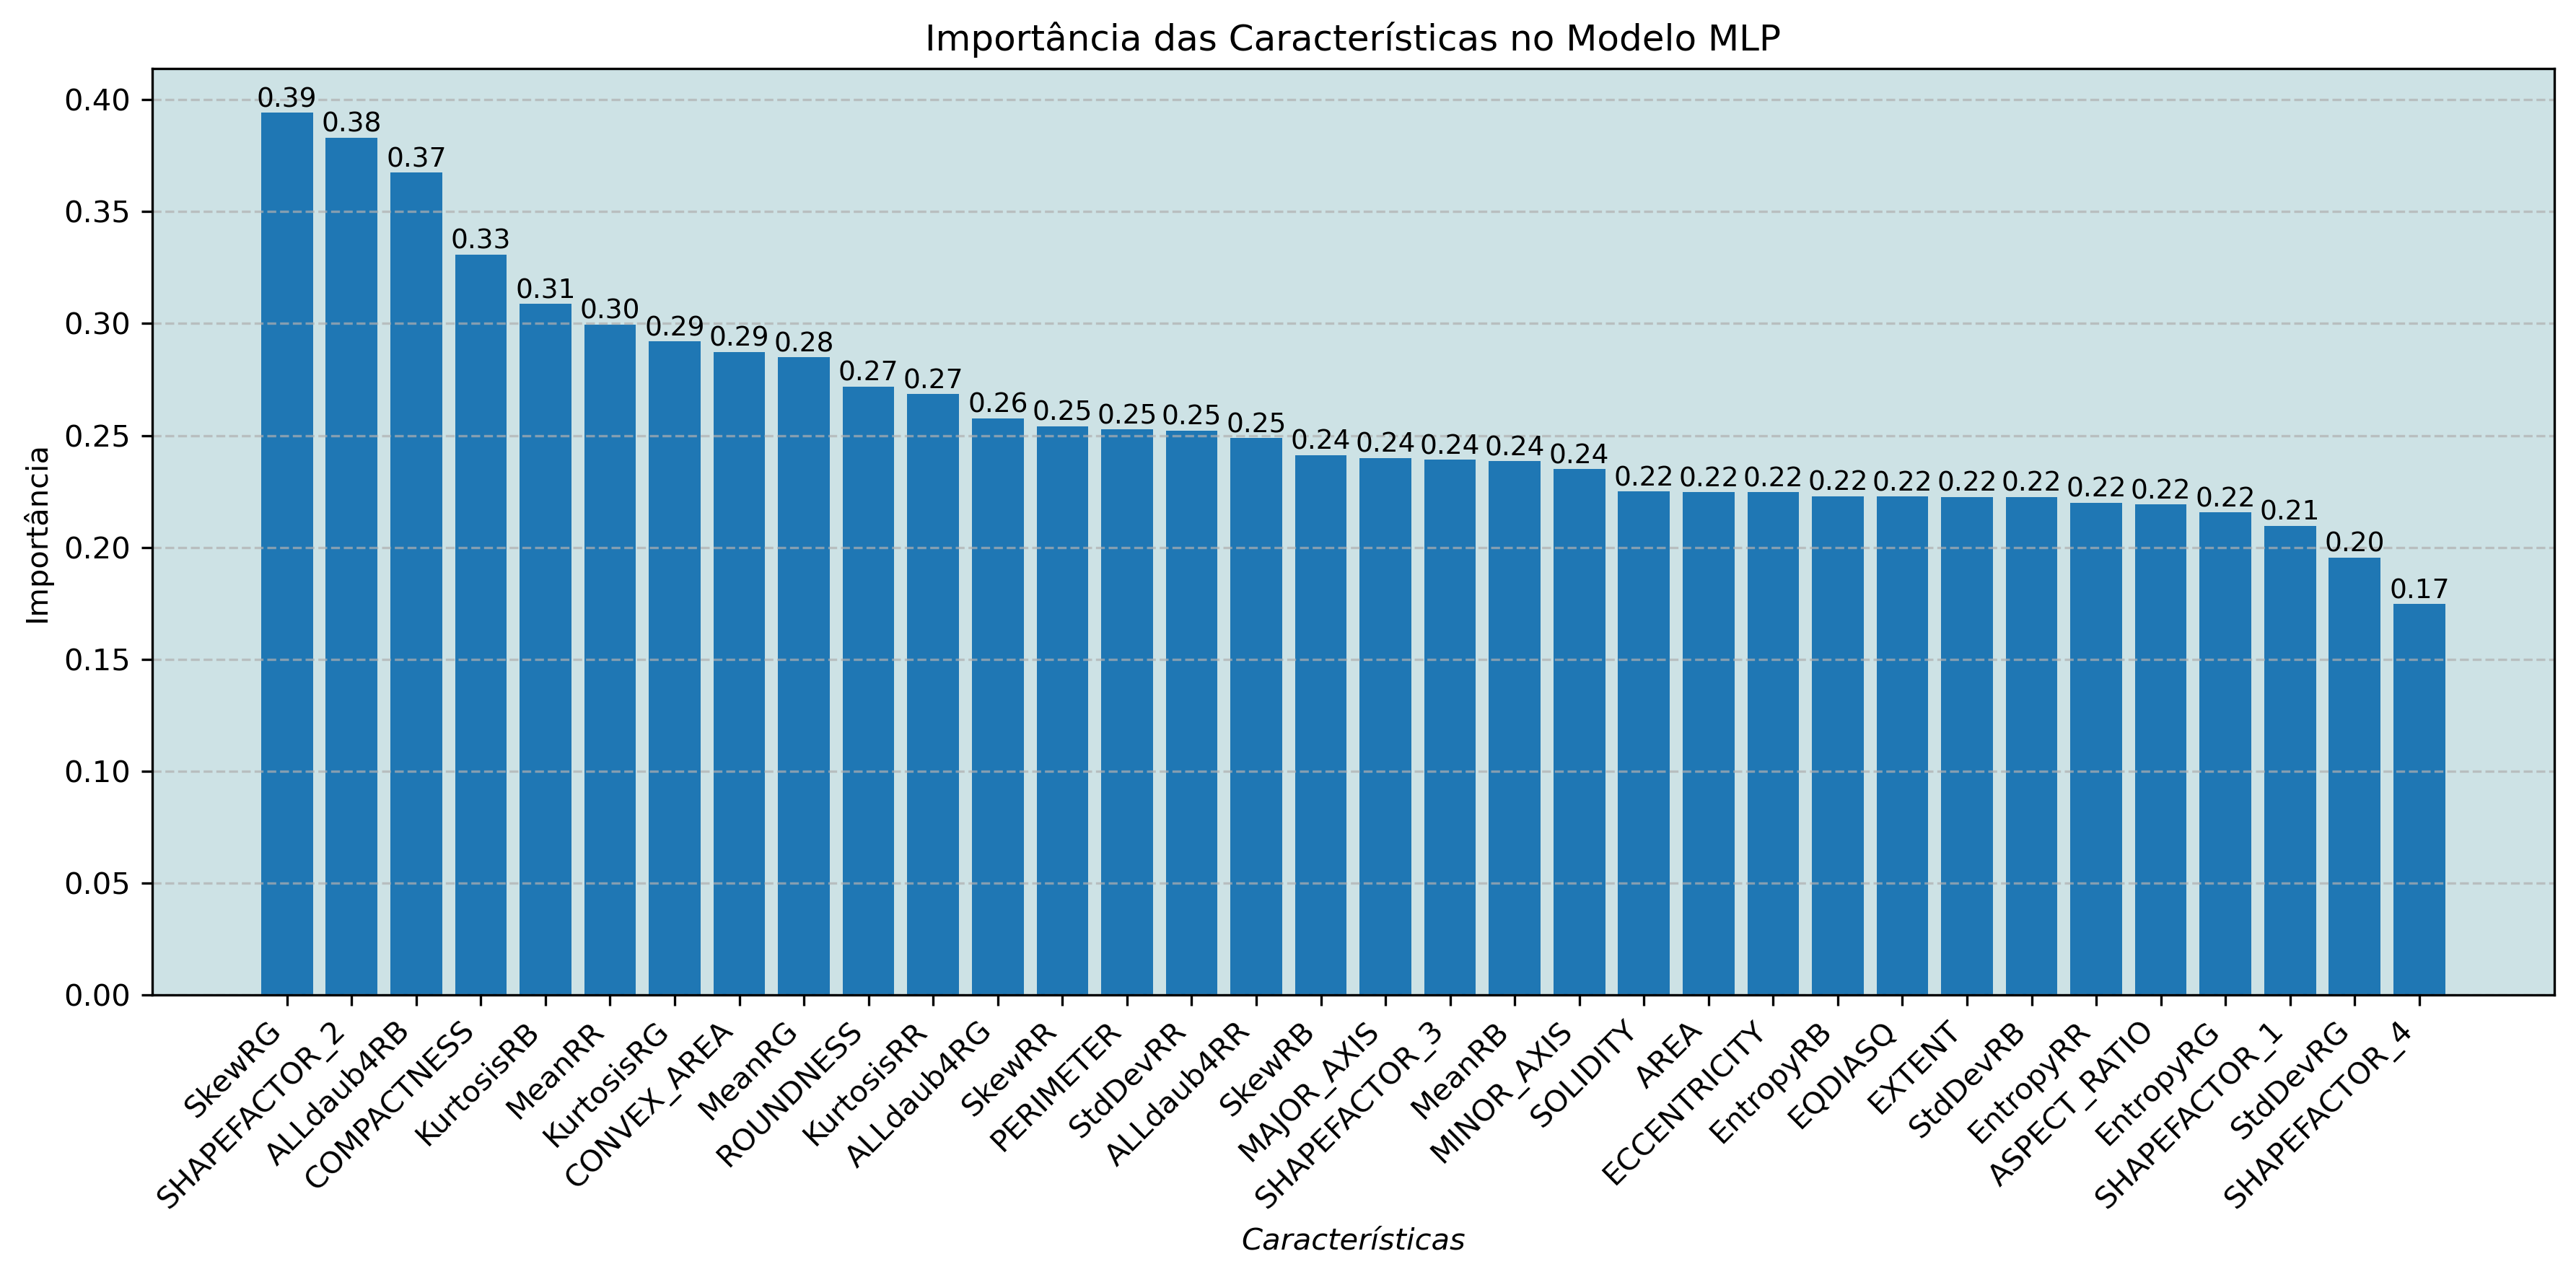

In [20]:
import numpy as np
import matplotlib.pyplot as plt

importances = np.abs(modelo_mlp.coefs_[0]).mean(axis=0)
feature_names = list(dados.columns.values)
sorted_indices = np.argsort(importances)[::-1]

sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Características', fontstyle='italic')
plt.ylabel('Importância')
plt.title('Importância das Características no Modelo MLP')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, '{:.2f}'.format(height),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 2.1.2 Local Surrogate:


O LIME (Local Interpretable Model-agnostic Explanations) é uma técnica que gera explicações locais para as predições de um modelo, fornecendo insights sobre a importância das características para uma instância específica.

Utilizaremos a biblioteca lime do python, 


In [21]:
import lime
from lime import lime_tabular

LABELS = dados['Class'].unique().tolist()

# Crie um explainer LIME
explainer = lime_tabular.LimeTabularExplainer(treino_x, feature_names=feature_names, class_names = LABELS)

np.random.seed(42)  # Defina uma semente para reproduzibilidade
random_indices = np.random.choice(len(teste_x), size=2, replace=False)
instance1 = teste_x[random_indices[0]]
instance2 = teste_x[random_indices[1]]

# Gerando as explicações para as instâncias selecionadas
explanation1 = explainer.explain_instance(instance1, modelo_mlp.predict_proba, num_features = 8, top_labels = 1)
explanation2 = explainer.explain_instance(instance2, modelo_mlp.predict_proba, num_features = 8, top_labels = 1)

explanation1.show_in_notebook()
explanation2.show_in_notebook()